# Spotify Supervised Learning

The main of this project is to explore different ways of classification of track's popularity based on the main features of the track. The dataset comes from the following [source](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks?datasetId=3431702)

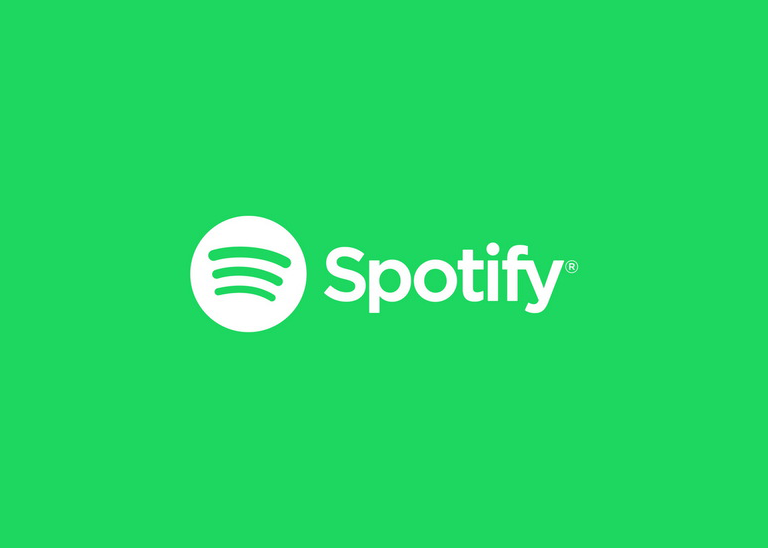

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
from IPython.display import YouTubeVideo

In [2]:
#Read dataset
os.chdir('D:\\Users\\sergi\\OneDrive\\Desktop\\0. Manchester\\0. Courses\\Personal projects\\Spotify Supervised')
spotify=pd.read_csv('spotify_data.csv')

**Details of variables**

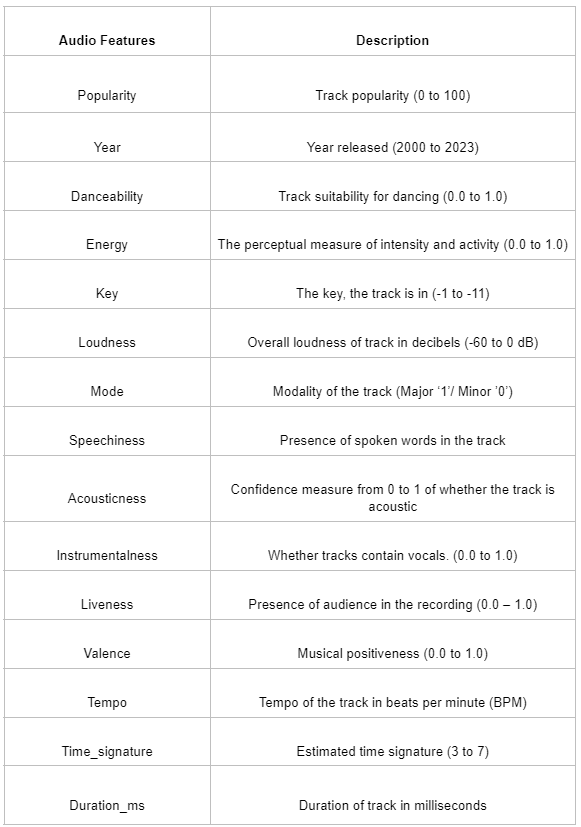

In [3]:
#Explore dataset
spotify.info() #Notice that there are not formal NAN values in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159764 non-null  object 
 2   track_name        1159764 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

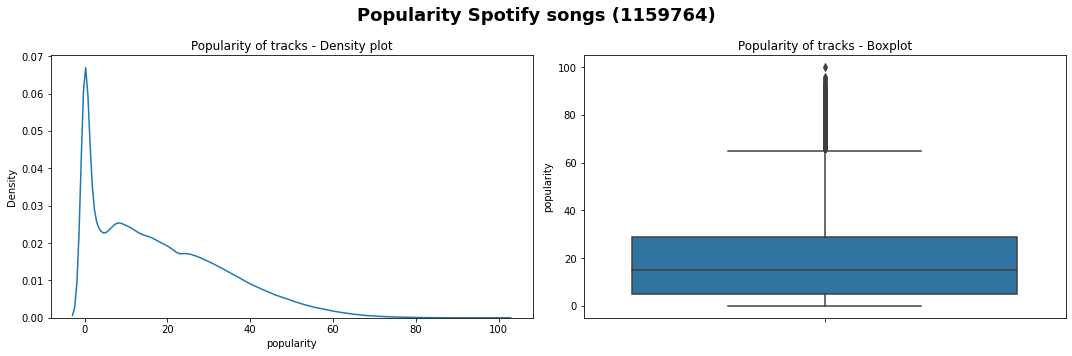

In [4]:
#Exploration of targe variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Popularity Spotify songs (1159764)',size=18,fontweight='bold')
sns.kdeplot(data=spotify,x='popularity',ax=ax1)
ax1.set_title('Popularity of tracks - Density plot')
sns.boxplot(data=spotify,y='popularity',ax=ax2)
ax2.set_title('Popularity of tracks - Boxplot')
plt.tight_layout()
plt.show()

In [5]:
#Based on the previous plots we can assume that it would be a good idea to create 5 categories of popularity (Non popular, almost not popular, popular, very popular, hit)
## I. Cut based on quantiles
spotify['popularity_cat'] = pd.qcut(spotify['popularity'],  #Based on which variable
                                    q=5, #How many cuts
                                    labels=['Not popular', 'Somehow popular', 'Popular', 'Very popular', 'Hit']) #Labels of cuts
## II. Cut based on personal criteria (based on plots)
cutoff_values = [-1, 15, 30, 45, 60, 100] #6 because it will give 5 bins (f.e. 'from 0 to 15' would be the first group). It starts in -1 to consider 0 (if we choose 0 it would exclude this one)

# Create the categories based on cutoff values
spotify['popularity_cat2'] = pd.cut(spotify['popularity'], #Notice that here the function is cut instead of qcut (only difference)
                                    bins=cutoff_values, #instead of q
                                    labels=['Not popular', 'Somehow popular', 'Popular', 'Very popular', 'Hit'])

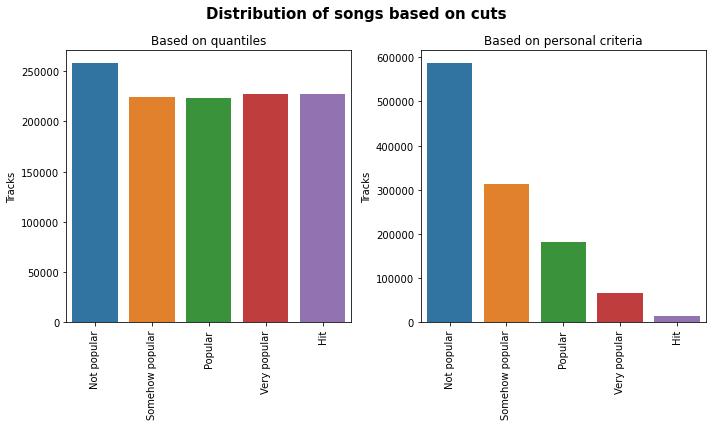

In [6]:
#Explore the distribution
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
plt.suptitle('Distribution of songs based on cuts',fontsize=15,fontweight='bold')
sns.countplot(data=spotify,x='popularity_cat',ax=ax1)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Based on quantiles')
ax1.set_ylabel('Tracks')
ax1.set_xlabel('')
sns.countplot(data=spotify,x='popularity_cat2',ax=ax2)
ax2.tick_params(axis='x', rotation=90)
ax2.set_title('Based on personal criteria')
ax2.set_ylabel('Tracks')
ax2.set_xlabel('')
plt.tight_layout()
plt.show()

In [7]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   Unnamed: 0        1159764 non-null  int64   
 1   artist_name       1159764 non-null  object  
 2   track_name        1159764 non-null  object  
 3   track_id          1159764 non-null  object  
 4   popularity        1159764 non-null  int64   
 5   year              1159764 non-null  int64   
 6   genre             1159764 non-null  object  
 7   danceability      1159764 non-null  float64 
 8   energy            1159764 non-null  float64 
 9   key               1159764 non-null  int64   
 10  loudness          1159764 non-null  float64 
 11  mode              1159764 non-null  int64   
 12  speechiness       1159764 non-null  float64 
 13  acousticness      1159764 non-null  float64 
 14  instrumentalness  1159764 non-null  float64 
 15  liveness          1159764 non-nu

### Exploratory Data Analysis

Using the first kind of cut, lets explore the distribution of popularity based on some track features. First, we should identify which variables are numeric and which ones categorical from a conceptual and contextual perspective

In [8]:
features_numeric=['danceability','energy','loudness','speechiness','acousticness','instrumentalness',
        'liveness','valence','tempo','duration_ms','year']
features_categorical=['genre','mode']

##### Numerical features

In [9]:
#Standarize numeric values
from sklearn.preprocessing import StandardScaler
normalizer=StandardScaler()
spotify[features_numeric]=normalizer.fit_transform(spotify[features_numeric])

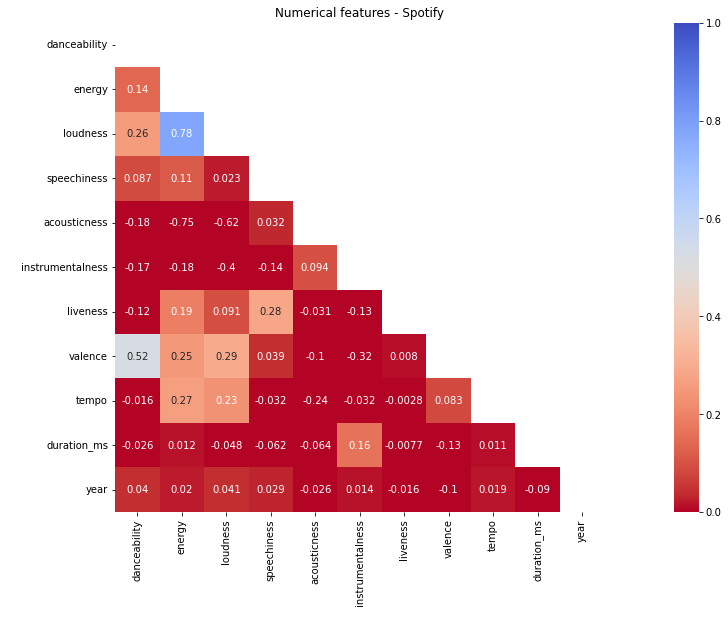

In [10]:
correlation_matrix=spotify[features_numeric].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Create heatmap
plt.figure(figsize=(25, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm_r", square=True,mask=mask, vmin=0,vmax=1)

# Add labels and title
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("Numerical features - Spotify")

# Show the plot
plt.show()

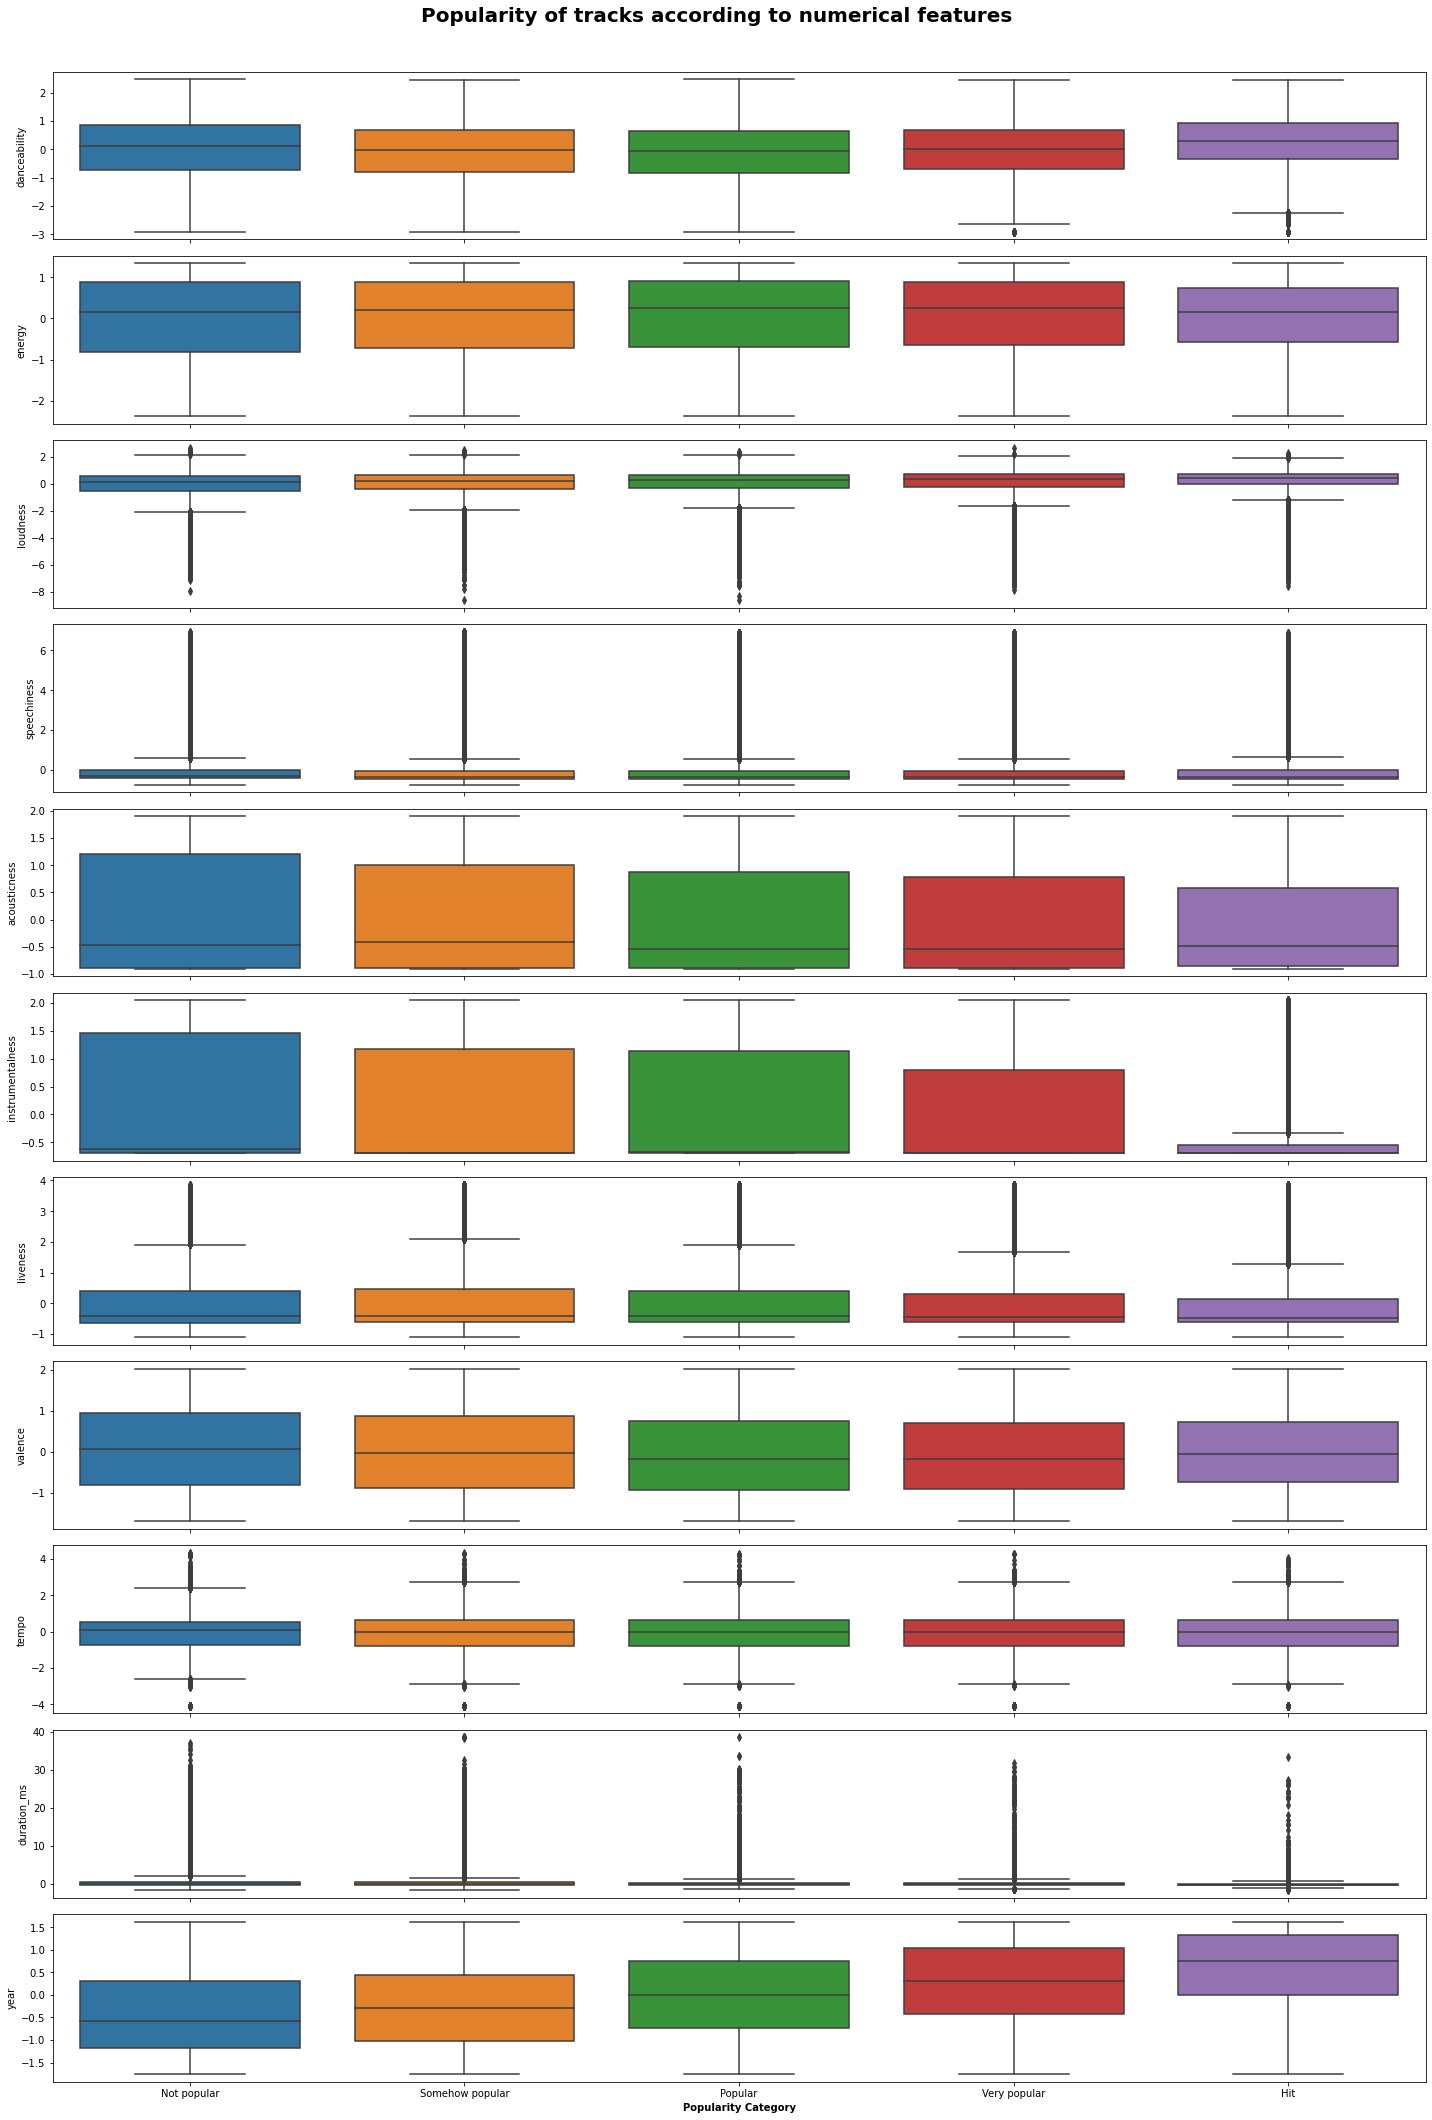

In [11]:
# Set up the subplots
fig, axes = plt.subplots(ncols=1, nrows=len(features_numeric), figsize=(20, 30),sharex=True)

# Create a boxplot for each variable against the dependent variable
for i, variable in enumerate(features_numeric):
    sns.boxplot(y=variable, x='popularity_cat', data=spotify, ax=axes[i])
    axes[i].set_xlabel('')
#Customization
plt.xlabel('Popularity Category',fontsize=10,fontweight='bold')
plt.suptitle('Popularity of tracks according to numerical features',fontsize=20,fontweight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.95) #To adjust title distance
# Display the subplots
plt.show()

In [12]:
##Due to the amount of data, it seems better to have a summary table

#This allow more efficient posterior calculations of statistics
agg_dict = {}
for feature in features_numeric:
    agg_dict[feature] = ['std', 'median','mean']

summary_table1=spotify.groupby('popularity_cat').agg(agg_dict).round(2)

#Now, to improve the presentation (Up to this point the columns are not easy to read since they are multi_index)
multi_index=summary_table1.columns #save the columns
merged_index = multi_index.map('_'.join) #Join the names - concatenate the levels of the multi-index with an underscore ('_') in between
summary_table1.columns=merged_index #Rename the columns to have simple columns
summary_table1 = summary_table1.rename_axis('Popularity1') #Change the name of the axis column
summary_table1 #Done :)

#Optional: In case you want to improve the presentation and put it on HTML format, this is the basis
# html_table=result.to_html()
# print(html_table)
# with open('table.html', 'w') as file:
#     file.write(html_table)

,danceability_std,danceability_median,danceability_mean,energy_std,energy_median,energy_mean,loudness_std,loudness_median,loudness_mean,speechiness_std,...,valence_mean,tempo_std,tempo_median,tempo_mean,duration_ms_std,duration_ms_median,duration_ms_mean,year_std,year_median,year_mean
Popularity1,,,,,,,,,,,,,,,,,,,,,
Not popular,1.04,0.11,0.02,1.03,0.16,-0.04,0.99,0.10,-0.13,1.02,...,0.08,0.97,0.08,-0.00,1.29,-0.09,0.12,0.97,-0.58,-0.42
Somehow popular,1.01,-0.02,-0.09,1.00,0.20,0.00,0.96,0.21,-0.05,1.23,...,0.03,1.00,-0.01,-0.00,1.13,-0.09,0.09,0.95,-0.29,-0.25
Popular,1.01,-0.07,-0.12,1.02,0.25,0.03,1.02,0.28,-0.01,1.06,...,-0.06,1.01,-0.02,-0.00,0.97,-0.13,0.02,0.94,0.01,-0.02
Very popular,0.98,0.02,-0.04,1.02,0.25,0.02,1.06,0.34,0.03,0.88,...,-0.07,1.02,-0.01,-0.00,0.80,-0.17,-0.06,0.94,0.30,0.21
Hit,0.92,0.31,0.24,0.92,0.15,-0.00,0.94,0.41,0.17,0.74,...,0.02,1.00,-0.01,0.01,0.57,-0.26,-0.19,0.90,0.74,0.53


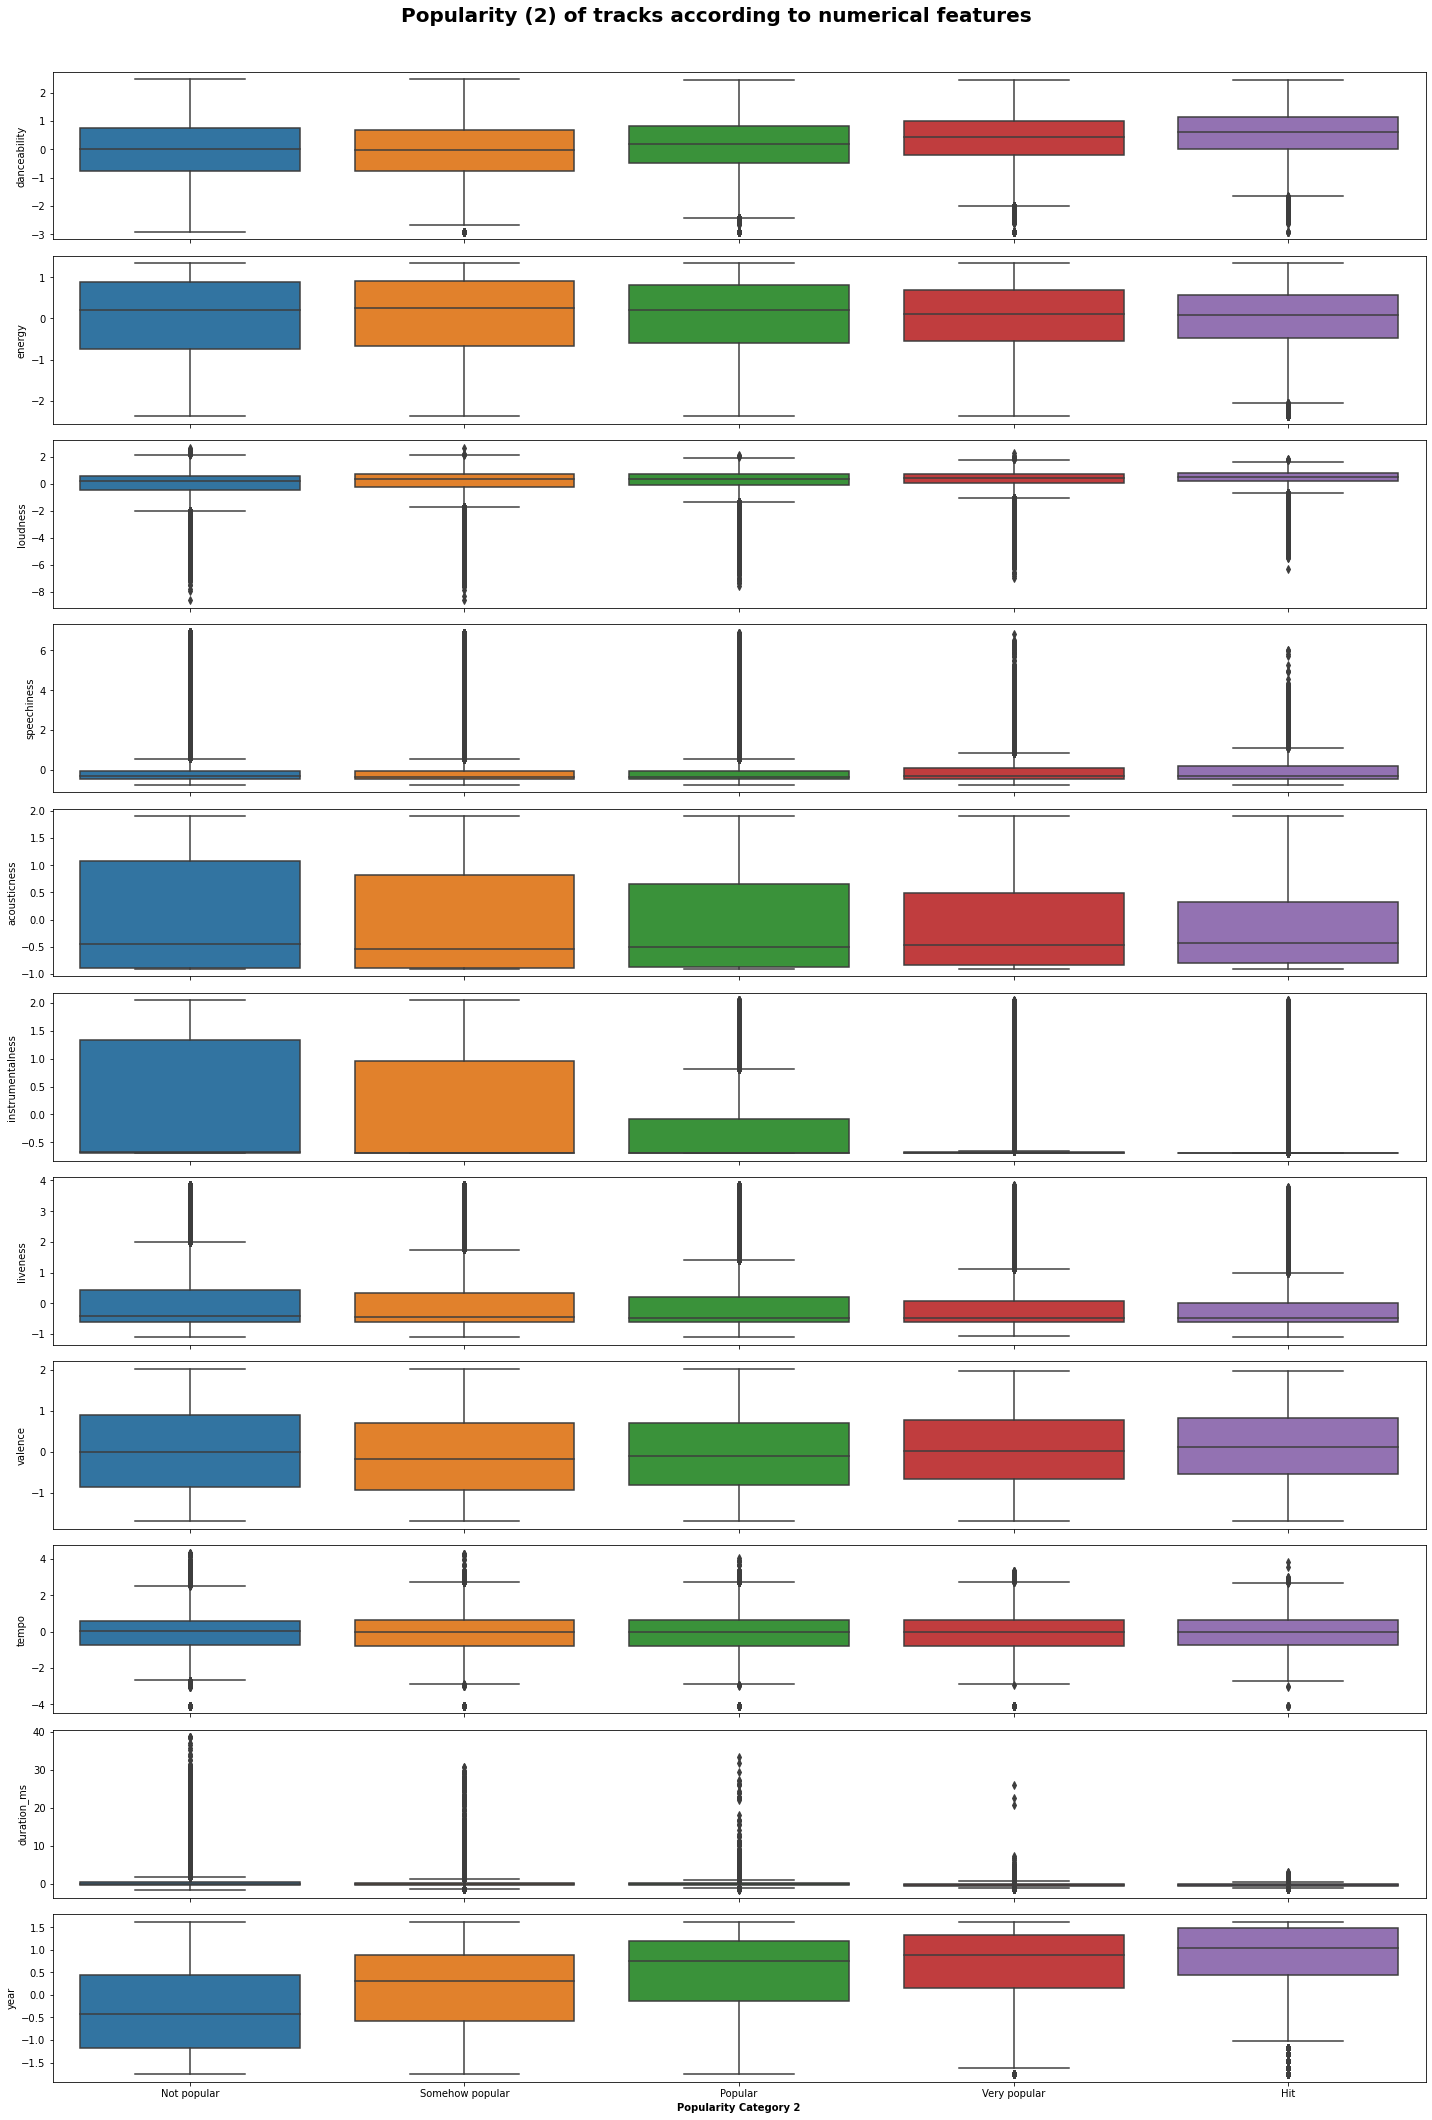

In [13]:
# Set up the subplots
fig, axes = plt.subplots(ncols=1, nrows=len(features_numeric), figsize=(20, 30),sharex=True)

# Create a boxplot for each variable against the dependent variable
for i, variable in enumerate(features_numeric):
    sns.boxplot(y=variable, x='popularity_cat2', data=spotify, ax=axes[i])
    axes[i].set_xlabel('')
# Customization
plt.xlabel('Popularity Category 2',fontsize=10,fontweight='bold')
plt.suptitle('Popularity (2) of tracks according to numerical features',fontsize=20,fontweight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.95) #To adjust title distance
# Display the subplots
plt.show()

In [14]:
#Same, lets create a table summary

#Dictionary
dictionary={}
for feature in features_numeric:
    dictionary[feature]=['std','median','mean']
summary_table2=spotify.groupby('popularity_cat2').agg(dictionary)
#Improve presentation
merged_index2=summary_table2.columns
new_mergedindex2=merged_index2.map("_".join)
summary_table2.columns=new_mergedindex2
summary_table2=summary_table2.rename_axis('Popularity2')
summary_table2

,danceability_std,danceability_median,danceability_mean,energy_std,energy_median,energy_mean,loudness_std,loudness_median,loudness_mean,speechiness_std,...,valence_mean,tempo_std,tempo_median,tempo_mean,duration_ms_std,duration_ms_median,duration_ms_mean,year_std,year_median,year_mean
Popularity2,,,,,,,,,,,,,,,,,,,,,
Not popular,1.021745,0.019307,-0.051039,1.016676,0.193456,-0.010162,0.979791,0.170946,-0.075521,1.123650,...,0.037719,0.987799,0.027027,-0.000189,1.184474,-0.096113,0.098653,0.963619,-0.434310,-0.295555
Somehow popular,0.996050,-0.024058,-0.078332,1.024288,0.245212,0.017982,1.059705,0.317368,0.011534,0.935441,...,-0.077116,1.018030,-0.021361,-0.006920,0.857979,-0.158840,-0.036518,0.940539,0.300563,0.133525
Popular,0.931004,0.192770,0.126595,0.963867,0.193456,0.006533,0.980604,0.382308,0.116500,0.727909,...,-0.024937,1.011655,-0.010448,0.010657,0.642422,-0.223922,-0.141703,0.918797,0.741487,0.434344
Very popular,0.883184,0.442122,0.370756,0.865680,0.112126,-0.013680,0.895790,0.437568,0.224946,0.767833,...,0.067454,0.993360,-0.012765,0.002810,0.465463,-0.303928,-0.259103,0.868516,0.888461,0.650179
Hit,0.838380,0.599322,0.533431,0.746936,0.086248,0.003142,0.749001,0.504971,0.358125,0.798912,...,0.152688,0.979275,-0.005864,0.011656,0.384128,-0.314013,-0.284109,0.821415,1.035436,0.770080


Some points to highlight:

* It is clear (by the tables) that the most popular tracks last less and are more danceable than the rest
* Using scatterplots is not helpful when dealing with tons of data (over a million for example). In these kinds of cases tables and heatmaps are more insightful.

##### Categorical features

In [15]:
#First lets recategorize year to have a better picture of the trendings
spotify2=pd.read_csv('spotify_data.csv')
spotify2['year_cat']=pd.cut(spotify2['year'],
                          bins=[1999,2004,2008,2012,2016,2020,2024],
                          labels=['2000-2003','2004-2007','2008-2011','2012-2015','2016-2019','2020-2023'])
##
#Based on the previous plots we can assume that it would be a good idea to create 5 categories of popularity (Non popular, almost not popular, popular, very popular, hit)
## I. Cut based on quantiles
spotify2['popularity_cat'] = pd.qcut(spotify2['popularity'],  #Based on which variable
                                    q=5, #How many cuts
                                    labels=['Not popular', 'Somehow popular', 'Popular', 'Very popular', 'Hit']) #Labels of cuts
## II. Cut based on personal criteria (based on plots)
cutoff_values = [-1, 15, 30, 45, 60, 100] #6 because it will give 5 bins (f.e. 'from 0 to 15' would be the first group). It starts in -1 to consider 0 (if we choose 0 it would exclude this one)

# Create the categories based on cutoff values
spotify2['popularity_cat2'] = pd.cut(spotify2['popularity'], #Notice that here the function is cut instead of qcut (only difference)
                                    bins=cutoff_values, #instead of q
                                    labels=['Not popular', 'Somehow popular', 'Popular', 'Very popular', 'Hit'])

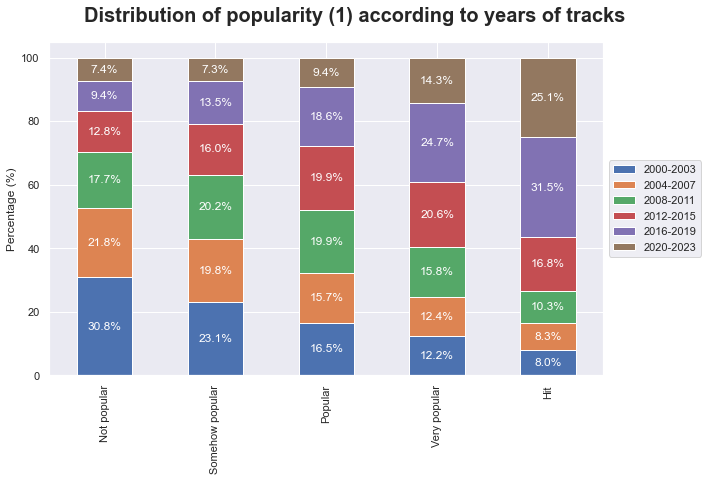

In [16]:
##POPULARITY 1
# Set a different theme for better appreciation (Optional)
sns.set(style="darkgrid")

# Calculate the percentage for each 'grouped year' category within each 'popularity' category
percentage_data = spotify2.groupby(['popularity_cat', 'year_cat']).size() / spotify2.groupby('popularity_cat').size() * 100 #Classic numerator/denominator

# Reset the index to have 'popularity' and 'grouped year' as columns
percentage_data = percentage_data.reset_index() #The new column will be called 0

# Pivot the data to have 'popularity' as index and years as columns. SCH: You have to put as index what will be your x categories and as columns what will be your legend
pivot_data = percentage_data.pivot(index='popularity_cat', columns='year_cat', values=0)

# Create the stacked percentage bar chart
ax = pivot_data.plot(kind='bar', stacked=True,figsize=(10,7))

# Set the y-axis label to '%'
ax.set_ylabel('Percentage (%)')
ax.set_xlabel(' ')
plt.suptitle('Distribution of popularity (1) according to years of tracks',fontsize=20,fontweight='bold')

# Move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# CHATGPT: Add labels for each percentage (Optional)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width/2, y + height/2), ha='center', va='center',color='white')

# Show the plot
plt.tight_layout()
plt.show()

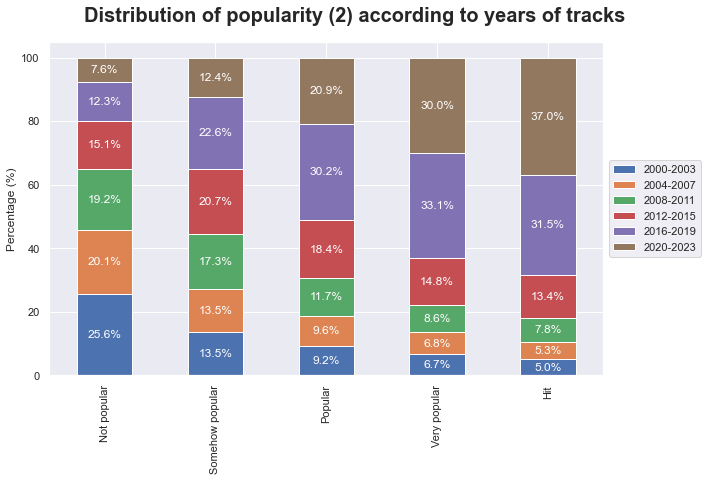

In [17]:
##POPULARITY 2
# Set a different theme for better appreciation (Optional)
sns.set(style="darkgrid")

# Calculate the percentage for each 'grouped year' category within each 'popularity' category
percentage_data = spotify2.groupby(['popularity_cat2', 'year_cat']).size() / spotify2.groupby('popularity_cat2').size() * 100 #Classic numerator/denominator

# Reset the index to have 'popularity' and 'grouped year' as columns
percentage_data = percentage_data.reset_index() #The new column will be called 0

# Pivot the data to have 'popularity' as index and years as columns. SCH: You have to put as index what will be your x categories and as columns what will be your legend
pivot_data = percentage_data.pivot(index='popularity_cat2', columns='year_cat', values=0)

# Create the stacked percentage bar chart
ax = pivot_data.plot(kind='bar', stacked=True,figsize=(10,7))

# Set the y-axis label to '%'
ax.set_ylabel('Percentage (%)')
ax.set_xlabel(' ')
plt.suptitle('Distribution of popularity (2) according to years of tracks',fontsize=20,fontweight='bold')

# Move legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# CHATGPT: Add labels for each percentage (Optional)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width/2, y + height/2), ha='center', va='center',color='white')

# Show the plot
plt.tight_layout()
plt.show()


#In both ways of categorization, the trend is showing the same thing: most popular songs are the most recent ones

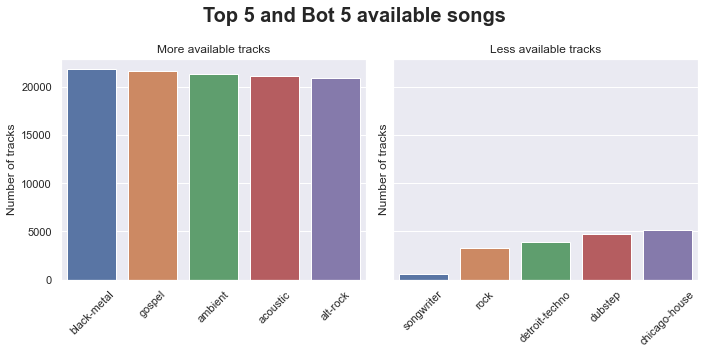

In [18]:
#There are too many genres (82). Therefore, is not possible to build a interpretable plot and we decide to explore just the top 5 categories of each category 
#First of all lets explore what are the genres with more tracks on the dataset
top5_total=pd.DataFrame(spotify.groupby('genre')['track_name'].count().sort_values(ascending=False).head(5)).reset_index()
bot5_total=pd.DataFrame(spotify.groupby('genre')['track_name'].count().sort_values(ascending=True).head(5)).reset_index()
#Plot them
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5),sharey=True)
plt.suptitle('Top 5 and Bot 5 available songs',fontsize=20,fontweight='bold')
ax1=sns.barplot(data=top5_total,x='genre',y='track_name',ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Number of tracks')
ax1.set_title('More available tracks')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45) #ax1.get_xticklabels is to replace the argument labels. Otherwise you have to directly specify it again
ax2=sns.barplot(data=bot5_total,x='genre',y='track_name',ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Number of tracks')
ax2.set_title('Less available tracks')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
plt.tight_layout()
plt.show()

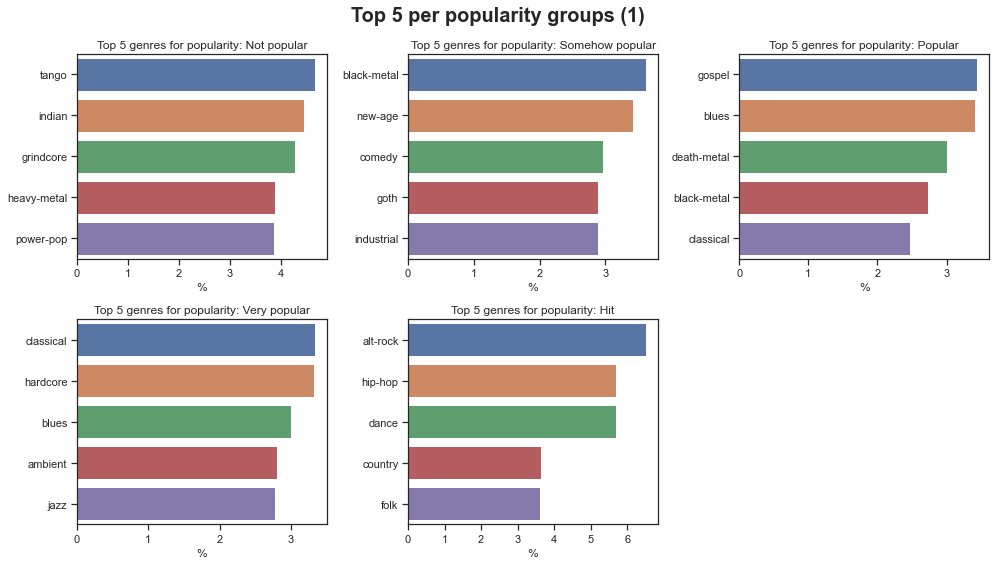

In [19]:
#Now lets explore the more abundant genres in each category of popularity

top_genres = pd.DataFrame(spotify.groupby('popularity_cat')['genre'].apply(lambda x: x.value_counts().nlargest(5)/x.count()*100)).reset_index() #nlargest is very useful function top fin top largest. Then we divide by the number of total tracks per popularity cat
bot_genres = pd.DataFrame(spotify.groupby('popularity_cat')['genre'].apply(lambda x: x.value_counts().nsmallest(5)/x.count()*100)).reset_index() #nsmallest is the opposite function

#Create a plot for each genre
popularities=top_genres['popularity_cat'].unique()
tops_generos=[]
#Create a list of dataframes
for popularity_level in popularities:
    df=top_genres[top_genres['popularity_cat']==popularity_level]
    tops_generos.append(df)
#Plot for each popularity
sns.set_style("ticks")
fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(14,8))
for i in range(5):
    if i < 3:
        ax=sns.barplot(data=tops_generos[i],y='level_1',x='genre',ax=axes[0,i])
    else:
        ax=sns.barplot(data=tops_generos[i],y='level_1',x='genre',ax=axes[1,i-3])
    ax.set_xlabel('%')
    ax.set_ylabel('')
    ax.set_title('Top 5 genres for popularity: ' + popularities[i])
fig.delaxes(axes[1][2]) #Delete empty subplot :)
plt.suptitle('Top 5 per popularity groups (1)',fontsize=20,fontweight='bold')
plt.tight_layout()

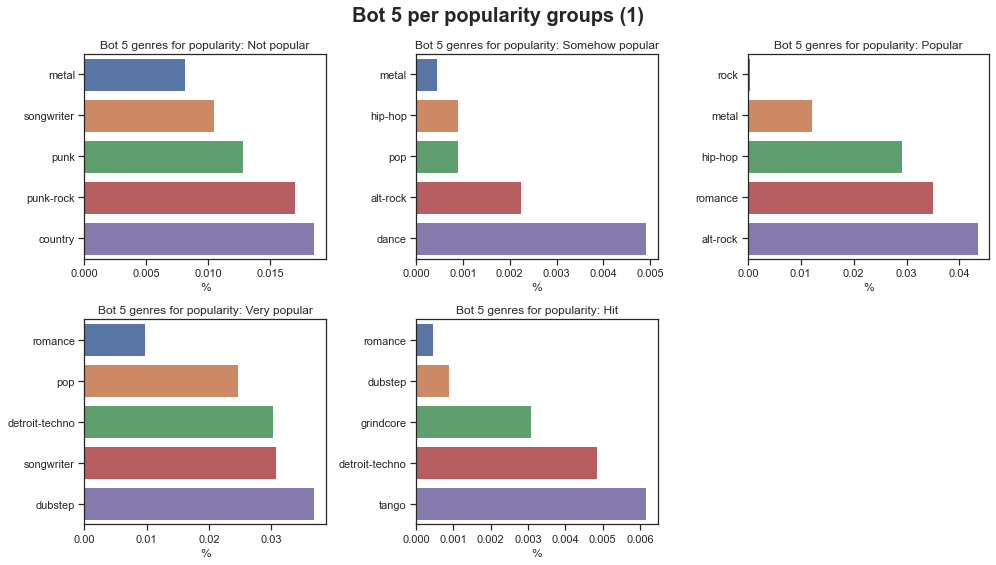

In [20]:
#Create a plot for each genre
popularities=top_genres['popularity_cat'].unique()
bots_generos=[]
#Create a list of dataframes
for popularity_level in popularities:
    df=bot_genres[bot_genres['popularity_cat']==popularity_level]
    bots_generos.append(df)
#Plot for each popularity
sns.set_style("ticks")
fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(14,8))
for i in range(5):
    if i < 3:
        ax=sns.barplot(data=bots_generos[i],y='level_1',x='genre',ax=axes[0,i])
    else:
        ax=sns.barplot(data=bots_generos[i],y='level_1',x='genre',ax=axes[1,i-3])
    ax.set_xlabel('%')
    ax.set_ylabel('')
    ax.set_title('Bot 5 genres for popularity: ' + popularities[i])
fig.delaxes(axes[1][2]) #Delete empty subplot :)
plt.suptitle('Bot 5 per popularity groups (1)',fontsize=20,fontweight='bold')
plt.tight_layout()

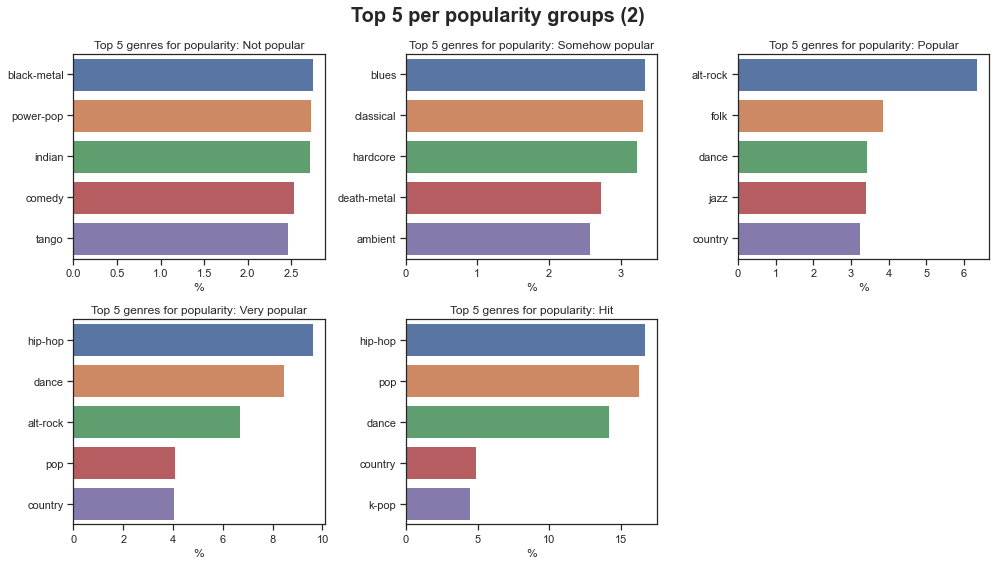

In [21]:
#Now lets explore the more abundant genres in each category of popularity

top_genres = pd.DataFrame(spotify.groupby('popularity_cat2')['genre'].apply(lambda x: x.value_counts().nlargest(5)/x.count()*100)).reset_index() #nlargest is very useful function top fin top largest. Then we divide by the number of total tracks per popularity cat
bot_genres = pd.DataFrame(spotify.groupby('popularity_cat2')['genre'].apply(lambda x: x.value_counts().nsmallest(5)/x.count()*100)).reset_index() #nsmallest is the opposite function

#Create a plot for each genre
popularities=top_genres['popularity_cat2'].unique()
tops_generos=[]
#Create a list of dataframes
for popularity_level in popularities:
    df=top_genres[top_genres['popularity_cat2']==popularity_level]
    tops_generos.append(df)
#Plot for each popularity
sns.set_style("ticks")
fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(14,8))
for i in range(5):
    if i < 3:
        ax=sns.barplot(data=tops_generos[i],y='level_1',x='genre',ax=axes[0,i])
    else:
        ax=sns.barplot(data=tops_generos[i],y='level_1',x='genre',ax=axes[1,i-3])
    ax.set_xlabel('%')
    ax.set_ylabel('')
    ax.set_title('Top 5 genres for popularity: ' + popularities[i])
fig.delaxes(axes[1][2]) #Delete empty subplot :)
plt.suptitle('Top 5 per popularity groups (2)',fontsize=20,fontweight='bold')
plt.tight_layout()

Something to notice here is that the predominancy of genres changes if we group popularity using different criterias. For example, using quintiles, the most common genre in the highest category of popularity is alt-rock. However, if we group by an 'expert' criteria that genre is not even in the top 5.

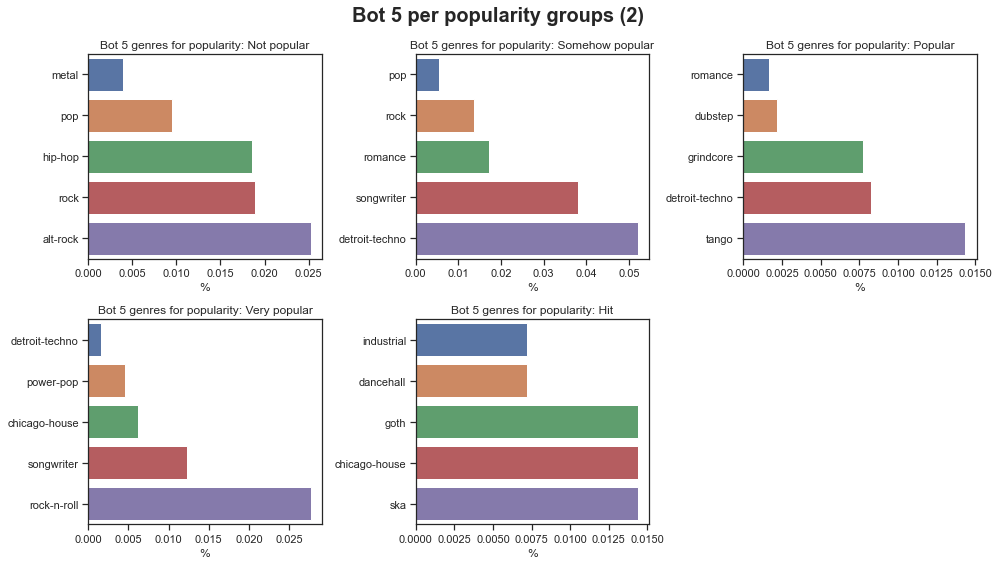

In [22]:
#Create a plot for each genre
popularities=top_genres['popularity_cat2'].unique()
bots_generos=[]
#Create a list of dataframes
for popularity_level in popularities:
    df=bot_genres[bot_genres['popularity_cat2']==popularity_level]
    bots_generos.append(df)
#Plot for each popularity
sns.set_style("ticks")
fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(14,8))
for i in range(5):
    if i < 3:
        ax=sns.barplot(data=bots_generos[i],y='level_1',x='genre',ax=axes[0,i])
    else:
        ax=sns.barplot(data=bots_generos[i],y='level_1',x='genre',ax=axes[1,i-3])
    ax.set_xlabel('%')
    ax.set_ylabel('')
    ax.set_title('Bot 5 genres for popularity: ' + popularities[i])
fig.delaxes(axes[1][2]) #Delete empty subplot :)
plt.suptitle('Bot 5 per popularity groups (2)',fontsize=20,fontweight='bold')
plt.tight_layout()

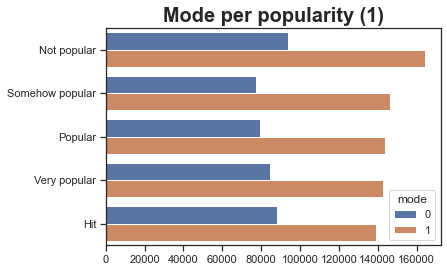

In [23]:
sns.countplot(data=spotify,y='popularity_cat',hue='mode')
plt.title('Mode per popularity (1)',fontsize=20,fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

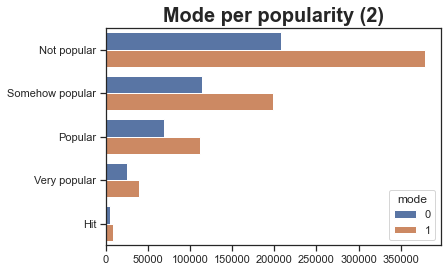

In [24]:
sns.countplot(data=spotify,y='popularity_cat2',hue='mode')
plt.title('Mode per popularity (2)',fontsize=20,fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

### PCA

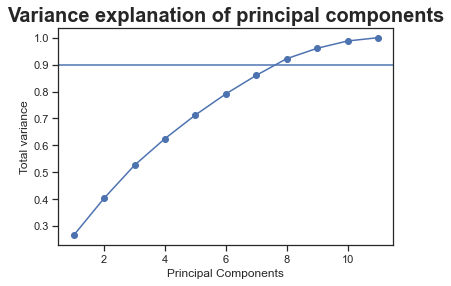

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=len(features_numeric),random_state=1) #At the beginning, use the same number of elements (to evaluate variance)
principal_components=pca.fit_transform(spotify[features_numeric])
#Plot of variance
cumulative_variance=np.cumsum(pca.explained_variance_ratio_) #To have the cumulative sums of components
x_axis=range(1,len(features_numeric)+1) #Just to create the x axis (in this case we want an array that goes from 1 to 10 - 10 elements)
#Plot
plt.plot(x_axis,cumulative_variance,marker='o')
plt.title('Variance explanation of principal components',fontsize=20,fontweight='bold')
plt.xlabel('Principal Components')
plt.ylabel('Total variance')
plt.axhline(0.9)
plt.show()
#If we consider just 7 factors we will retain more than 90% of the variance while having fewer features to deal 

In [26]:
#Now that we have decided the number of principal components, we can reapply the method specifying 7 components
import copy
#First we create a copy of our initial list (adding _pca at the end to differentiate)
features_numeric2=copy.deepcopy(features_numeric)
for i in range(len(features_numeric2)):
    features_numeric2[i]=str(features_numeric2[i])+'_pca'
#Names of the PCA's that we are going to create
feature_pca=[]
for i in range(7):
    x='PCA_'+str(i)
    feature_pca.append(x)
#PCA
pca=PCA(n_components=7,random_state=1)
spotify[feature_pca]=pca.fit_transform(spotify[features_numeric])

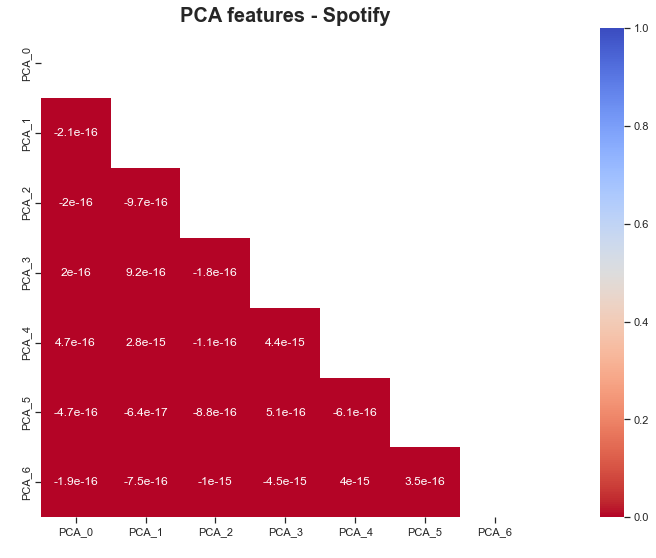

In [27]:
#Lets check the linear relationship of our new PCA
correlation_matrix=spotify[feature_pca].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Create heatmap
plt.figure(figsize=(25, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm_r", square=True,mask=mask, vmin=0,vmax=1)

# Add labels and title
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("PCA features - Spotify",fontsize=20,fontweight='bold')

# Show the plot
plt.show()

#PERFECT :)

### Dealing with categorical data

In [28]:
#MCA: Multiple Correspondence Analysis - It does not makes sense since we are only dealing with a categorical variable. Is good to know the technique though
#One hot encoding of categorical variables genre
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
genre_encoded=encoder.fit_transform(spotify[['genre']])#Double bracket!
# Convert the encoded to a Dataframe
spotify_encoded = pd.DataFrame(genre_encoded.toarray(),  #Convert the previous result into an array
                               columns=encoder.get_feature_names_out(['genre'])) #Add column names
# Concatenate the original dataframe with the one-hot encoded variables
spotify = pd.concat([spotify, spotify_encoded], axis=1) #Axis 1 means: add as columns

## Split data for training and test

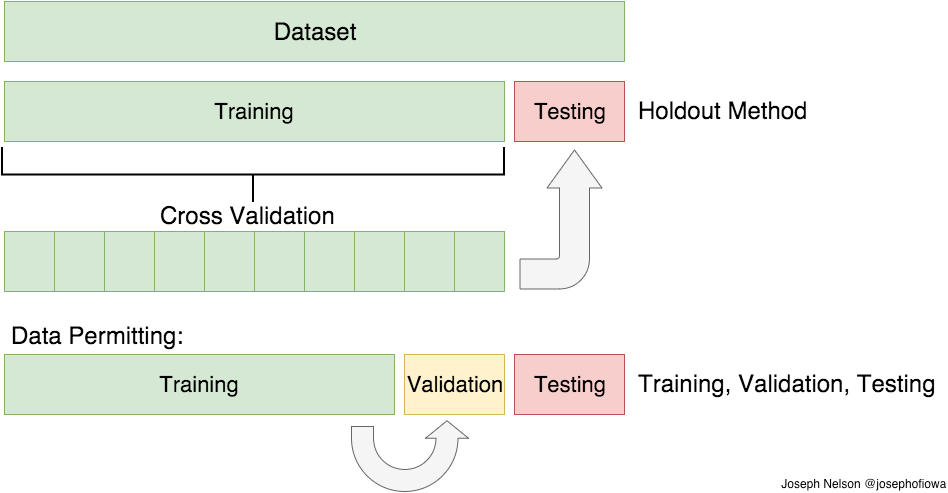

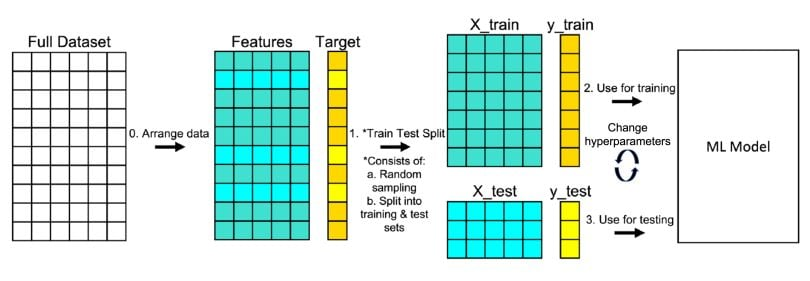

In [29]:
#Step 0. Lets encode our targets from 0 to 5.
mapping = {
    'Not popular': 1,
    'Somehow popular': 2,
    'Popular': 3,
    'Very popular': 4,
    'Hit': 5
} #Dictionary approach (the problem with label encoder from sckit learn is that it does not allow me to order the categories - as far as I know)
spotify['popularity_cat'] = spotify['popularity_cat'].map(mapping)
spotify['popularity_cat2'] = spotify['popularity_cat2'].map(mapping)

In [30]:
from sklearn.model_selection import train_test_split
### I. Popularity 1 (Even distribution)

#A. So first lets separate the dataset into features and targets
#Target
Y=spotify['popularity_cat']
#Features
features=encoder.get_feature_names_out(['genre']).tolist()
features_numeric.append('mode')
for i in features_numeric:
    features.append(i)
X=spotify[features]
#Identificators (for later)
identificators=spotify[['artist_name','track_name','track_id']]

#B. Split into TRAIN and TEST
x_train1, x_test1, y_train1, y_test1 = train_test_split(X,Y, 
                                                 test_size=0.2, 
                                                 random_state=25, 
                                                 stratify=spotify['popularity_cat']) #Actually we could have done this as the first step but that would mean that the next step is to  split into X and Y. If we want to do this as the first step we would only have two outputs. Is because we are using two inputs (X,Y) that we are getting 4 outputs. Be sure that your data is correctly arranged


In [31]:
### II. Popularity 2 (Expert cutoff)

#A. So first lets separate the dataset into features and targets
#Target
Y=spotify['popularity_cat2']
#Features
features=encoder.get_feature_names_out(['genre']).tolist()
features_numeric.append('mode')
for i in features_numeric:
    features.append(i)
X=spotify[features]
#Identificators (for later)
identificators=spotify[['artist_name','track_name','track_id']]

#B. Split into TRAIN and TEST
x_train2, x_test2, y_train2, y_test2 = train_test_split(X,Y, 
                                                 test_size=0.2, 
                                                 random_state=25, 
                                                 stratify=spotify['popularity_cat2']) #Actually we could have done this as the first step but that would mean that the next step is to  split into X and Y. If we want to do this as the first step we would only have two outputs. Is because we are using two inputs (X,Y) that we are getting 4 outputs. Be sure that your data is correctly arranged


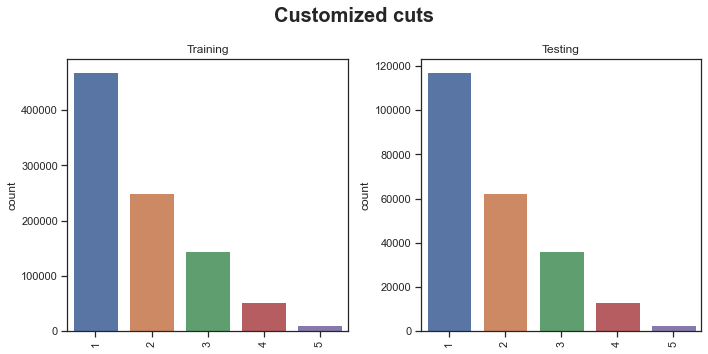

In [32]:
#Notice that the proportion are kept for the second split
import warnings
warnings.filterwarnings("ignore")
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
plt.suptitle('Customized cuts',fontsize=20,fontweight='bold')
sns.countplot(y_train2,ax=ax1)
ax1.set_title('Training')
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=90)
sns.countplot(y_test2,ax=ax2)
ax2.set_title('Testing')
ax2.set_xlabel('')
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

### Evaluation Functions

Before trying different algorithms of classification, we use this space to allocate the functions that we will use to evaluate each process

In [33]:
#To save main characteristics of each model
def results_cv(scores,name='',time=time,typeproblem=int()):
    df={'Name model':[name],
        'Targe Type':[typeproblem],
       'Average F1 Macro CV':[np.mean(scores)],
        'Std F1 Macro CV':[np.std(scores)],
       'Time cross (seconds)':[np.round(time,2)]}
    return(pd.DataFrame(df))    

In [34]:
#To save main characteristics of each model after hyperparameter optimization
def results_cv2(scores,modelstried,timemodels,name='',time=time,typeproblem=int()):
    df={'Name model':[name],
        'Targe Type':[typeproblem],
       'Average F1 Macro CV':[np.mean(scores)],
        'Std F1 Macro CV':[np.std(scores)],
        'Models tried': [modelstried],
        'Average train time per model (seconds)':[np.round(timemodels,2)],
       'Total time training (seconds)':[np.round(time,2)]}
    return(pd.DataFrame(df))  

In [35]:
#Confussion matrix to evaluate results. The percentage displays are based on the true values
def confuxion_matrix_trains(predictions,scores_loaded,y_train): #Here we erase scores_loaded as an argument (is not used)
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import f1_score
    confusion_matrix=confusion_matrix(y_train,predictions,normalize='true')
    #Heathmap
    plt.figure(figsize=(10,8))
    ax=sns.heatmap(confusion_matrix,
            cmap="coolwarm_r", #Change colors (the _r is to reverse the original format). 
            annot=True,
            fmt=".1%") #To avoid scientific notatioon #If we put f is just digits, % to convert to percentages
    ax.xaxis.set_ticklabels(['Not popular', 'Somehow popular','Popular','Very popular','Hit']) 
    ax.yaxis.set_ticklabels(['Not popular', 'Somehow popular','Popular','Very popular','Hit'])
    plt.xlabel('Predicted',size=20)
    plt.ylabel('Truth',size=20)
    plt.title('Confusion Matrix - F1 Macro Score in Test: '+str(round(f1_score(y_train, predictions, average='weighted'),3)),size=17,fontweight='bold')
    plt.tight_layout()
    plt.show()

In [36]:
#Confussion matrix to evaluate results AFTER HYPERPARAMETER OPTIMIZATION. The percentage displays are based on the true values
def confux_matrix_opti(modelname,bestmodel,x_test,y_test):
    from sklearn.metrics import confusion_matrix
    predictions=bestmodel.predict(x_test)
    cm=confusion_matrix(y_test,predictions,normalize='true')
    plt.figure(figsize=(10,8))
    ax=sns.heatmap(cm,
                  cmap='coolwarm_r',
                  annot=True,
                  fmt=".1%")
    ax.xaxis.set_ticklabels(['Not popular', 'Somehow popular','Popular','Very popular','Hit']) 
    ax.yaxis.set_ticklabels(['Not popular', 'Somehow popular','Popular','Very popular','Hit'])
    plt.xlabel('Predicted',size=20)
    plt.ylabel('Truth',size=20)
    plt.title(modelname+'\nConfusion Matrix - F1 Macro Score in Test: '+str(round(f1_score(y_test, predictions, average='macro'),3)),size=17,fontweight='bold')
    plt.tight_layout()
    plt.show()

## Classification (Supervised Learning)

F1 Macro will be the selected metric to evaluate all algorithms since it is a measure that consider both precision and recall. This is specially important in context b where the data is clearly unbalanced. **F1 MACRO will give equal value to all classes no matter the number of cases.**

It is important to use a variation of F1 score and the the standard one since F1 is only useful for binary classification. For more details and options see this [link](https://scikit-learn.org/stable/modules/model_evaluation.html)



In [37]:
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

### 0. Multinomial Logistic Regression

#### a. Even distribution

In [38]:
from sklearn.linear_model import LogisticRegression
#A. Create simple instance
multilogi1=LogisticRegression(multi_class='multinomial', #because our target has more than 2 categories we cannot use the regular binary logistic classification
                             solver='lbfgs')
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [39]:
# start_time = time.time()
# #C. Cross validation (prueba of stratified)
# multilogi_score1 = cross_val_score(multilogi1, x_train1, y_train1, cv=kfold,n_jobs=5,scoring='f1_macro') #F1 macro is a good metric for unbalanced dataset and when you want to give same importance to all categories
# #Time
# end_time = time.time()
# model_time_multilogi1 = end_time - start_time

In [40]:
# # D. Fit (Cross val score does not fit the model)
# multilogi1.fit(x_train1,y_train1)
# # E. Predict
# predictions_multilogi1=multilogi1.predict(x_test1) #With test now

In [41]:
# import joblib
# # Save the trained model
# joblib.dump(multilogi1, 'multilogi1_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('multilogi1_scores.csv', multilogi_score1, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_multilogi1.pkl', 'wb') as file:
#     pickle.dump(predictions_multilogi1, file)
# # Save time
# with open('model_time_multilogi1.txt', 'w') as file:
#     file.write(str(model_time_multilogi1))

In [42]:
import joblib
# Load the saved model
multilogi1_loaded = joblib.load('multilogi1_model.pkl')
# Load the saved scores
multilogi1_scores_loaded = np.loadtxt('multilogi1_scores.csv', delimiter=',')
# Load the predictions
with open('predictions_multilogi1.pkl', 'rb') as file:
    predictions_multilogi1 = pickle.load(file)
# Load time spent in training cv
with open('model_time_multilogi1.txt', 'r') as file:
    model_time_multilogi1 = file.read()
model_time_multilogi1 = float(model_time_multilogi1)  # Convert the string back to an integer if needed
print(model_time_multilogi1)

50.23456811904907


In [43]:
#Results
MULTILOG1_Results=results_cv(scores=multilogi1_scores_loaded,name='LOG',time=model_time_multilogi1,typeproblem=1)
MULTILOG1_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,LOG,1,0.479592,0.00032,50.23


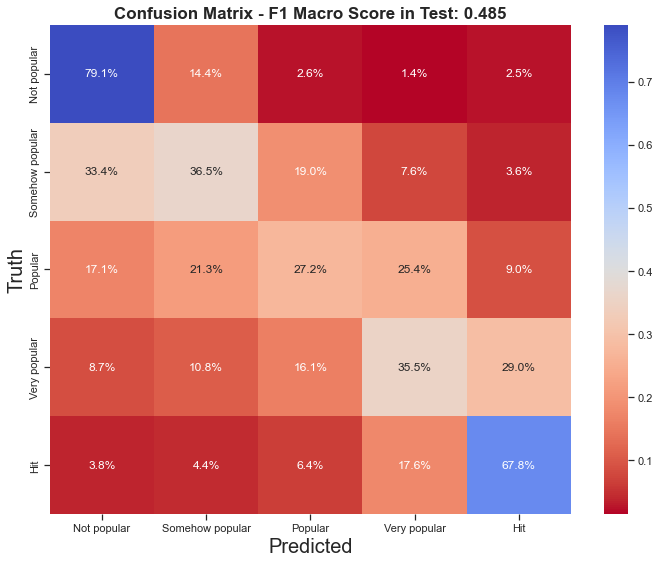

In [44]:
confuxion_matrix_trains(predictions=predictions_multilogi1,scores_loaded=multilogi1_scores_loaded,y_train=y_test1)

In [45]:
#EXTRA: A benefit of multinomial logistic regression is that it can predict calibrated probabilities across all known class labels in the dataset
#This is a great advantage because LR give us probabilistic insights of what could have been

#Lets explore more in detail the probabilities of the first case of the test data
multilogi1_loaded.predict_proba(x_test1.iloc[1,:].values.reshape(1, -1)) #We need to reshape to adequate the data
#The results sum 1 (softmax have been applied). Notice that the class with higher value is the predicted one. However, in this case it seems that class 3 was also very close to be choosen

print('The value predicted for the first case of x_test was', multilogi1_loaded.predict(x_test1.iloc[1,:].values.reshape(1,-1)), 
     ' \n The probabilities assign to each class were',multilogi1_loaded.predict_proba(x_test1.iloc[1,:].values.reshape(1,-1)))

The value predicted for the first case of x_test was [4]  
 The probabilities assign to each class were [[0.01309346 0.01612941 0.39324658 0.41721469 0.16031586]]


#### B. Uneven distribution (expert cutoff)

In [46]:
from sklearn.linear_model import LogisticRegression
#A. Create simple instance
multilogi2=LogisticRegression(multi_class='multinomial', #because our target has more than 2 categories we cannot use the regular binary logistic classification
                             solver='lbfgs')
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [47]:
# start_time = time.time()
# #C. Cross validation (prueba of stratified)
# multilogi_score2 = cross_val_score(multilogi2, x_train2, y_train2, cv=kfold,n_jobs=5,scoring='f1_macro') #F1 macro is a good metric for unbalanced dataset and when you want to give same importance to all categories
# #Time
# end_time = time.time()
# model_time_multilogi2 = end_time - start_time

In [48]:
# # D. Fit (Cross val score does not fit the model)
# multilogi2.fit(x_train2,y_train2)
# # E. Predict
# predictions_multilogi2=multilogi2.predict(x_test2) #With test now

In [49]:
# import joblib
# # Save the trained model
# joblib.dump(multilogi2, 'multilogi2_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('multilogi2_scores.csv', multilogi_score2, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_multilogi2.pkl', 'wb') as file:
#     pickle.dump(predictions_multilogi2, file)
# # Save time
# with open('model_time_multilogi2.txt', 'w') as file:
#     file.write(str(model_time_multilogi2))

In [50]:
import joblib
# Load the saved model
multilogi2_loaded = joblib.load('multilogi2_model.pkl')
# Load the saved scores
multilogi2_scores_loaded = np.loadtxt('multilogi2_scores.csv', delimiter=',')
# Load the predictions
with open('predictions_multilogi2.pkl', 'rb') as file:
    predictions_multilogi2 = pickle.load(file)
# Load time spent in training cv
with open('model_time_multilogi2.txt', 'r') as file:
    model_time_multilogi2 = file.read()
model_time_multilogi2 = float(model_time_multilogi2)  # Convert the string back to an integer if needed
print(model_time_multilogi2)

44.686365604400635


In [51]:
#Results
MULTILOG2_Results=results_cv(scores=multilogi2_scores_loaded,name='LOG',time=model_time_multilogi2,typeproblem=2)
MULTILOG2_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,LOG,2,0.454762,0.003457,44.69


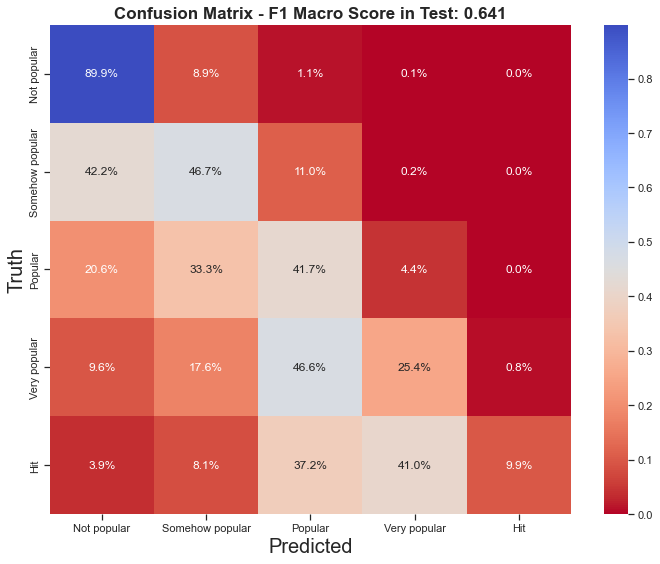

In [52]:
confuxion_matrix_trains(predictions=predictions_multilogi2,scores_loaded=multilogi2_scores_loaded,y_train=y_test2)

In [53]:
#EXTRA: A benefit of multinomial logistic regression is that it can predict calibrated probabilities across all known class labels in the dataset
#This is a great advantage because LR give us probabilistic insights of what could have been

#Lets explore more in detail the probabilities of the first case of the test data
multilogi2_loaded.predict_proba(x_test2.iloc[1,:].values.reshape(1, -1)) #We need to reshape to adequate the data
#The results sum 1 (softmax have been applied). Notice that the class with higher value is the predicted one. However, in this case it seems that class 3 was also very close to be choosen

print('The value predicted for the first case of x_test was', multilogi2_loaded.predict(x_test2.iloc[1,:].values.reshape(1,-1)), 
     ' \n The probabilities assign to each class were',multilogi2_loaded.predict_proba(x_test2.iloc[1,:].values.reshape(1,-1)))

The value predicted for the first case of x_test was [1]  
 The probabilities assign to each class were [[5.86230552e-01 3.33856129e-01 7.43334953e-02 5.41783013e-03
  1.61993924e-04]]


### I. K-Nearest Neighboor

#### a. Even distribution

In [54]:
from sklearn.neighbors import KNeighborsClassifier
#A. Create simple instance
knearest=KNeighborsClassifier(n_neighbors=5) #The number of neighbors does not matter because we are going to optimize from the get go
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [55]:
# start_time = time.time()
# #C. Cross validation (prueba of stratified)
# knearest_score1 = cross_val_score(knearest, x_train1, y_train1, cv=kfold,n_jobs=5,scoring='f1_macro') #F1 macro is a good metric for unbalanced dataset and when you want to give same importance to all categories
# #Time
# end_time = time.time()
# model_time_knearest1 = end_time - start_time

In [56]:
# # D. Fit (Cross val score does not fit the model)
# knearest.fit(x_train1,y_train1)
# # E. Predict
# predictions_knn1=knearest.predict(x_test1) #With test now

In [57]:
# import joblib
# # Save the trained model
# joblib.dump(knearest, 'knearest_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('knearest_scores.csv', knearest_score1, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_knn1.pkl', 'wb') as file:
#     pickle.dump(predictions_knn1, file)
# # Save time
# with open('model_time_knearest1.txt', 'w') as file:
#     file.write(str(model_time_knearest1))

In [58]:
import joblib
# Load the saved model
knearest_loaded = joblib.load('knearest_model.pkl')
# Load the saved scores
knearest_scores_loaded = np.loadtxt('knearest_scores.csv', delimiter=',')
# Load the predictions
with open('predictions_knn1.pkl', 'rb') as file:
    predictions_knn1 = pickle.load(file)
# Load time spent in training cv
with open('model_time_knearest1.txt', 'r') as file:
    model_time_knearest1 = file.read()
model_time_knearest1 = float(model_time_knearest1)  # Convert the string back to an integer if needed
print(model_time_knearest1)

5225.35822892189


In [59]:
#Results
KNN1_Results=results_cv(scores=knearest_scores_loaded,name='KNN',time=model_time_knearest1,typeproblem=1)
KNN1_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,KNN,1,0.474676,0.00055,5225.36


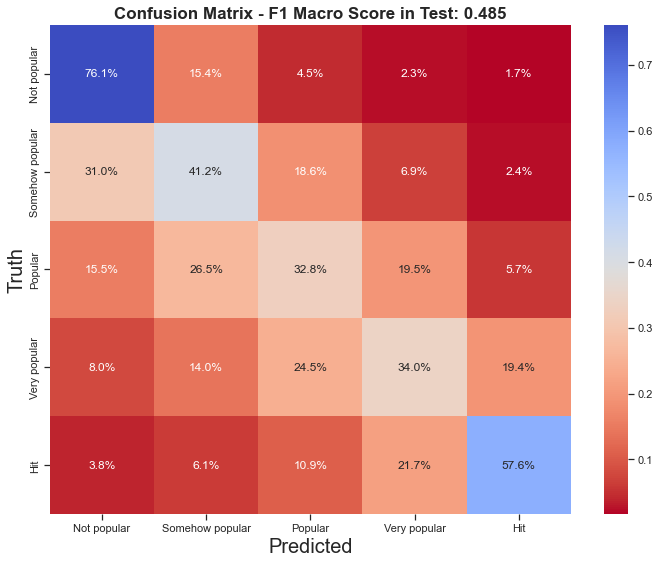

In [60]:
confuxion_matrix_trains(predictions=predictions_knn1,scores_loaded=knearest_scores_loaded,y_train=y_test1)

#### B. Uneven distribution (expert cutoff)

In [61]:
#A. Create simple instance
knearest2=KNeighborsClassifier(n_neighbors=5) #The number of neighbors does not matter because we are going to optimize from the get go
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [62]:
# start_time = time.time()
# #C. Cross validation (prueba of stratified)
# knearest_score2 = cross_val_score(knearest2, x_train2, y_train2, cv=kfold,n_jobs=5,scoring='f1_macro') #F1 macro is a good metric for unbalanced dataset and when you want to give same importance to all categories
# #Time
# end_time = time.time()
# model_time_knearest2 = end_time - start_time

In [63]:
# # D. Fit (Cross val score does not fit the model)
# knearest2.fit(x_train2,y_train2)
# # E. Predict
# predictions_knn2=knearest2.predict(x_test2) 

In [64]:
# # Save the trained model
# joblib.dump(knearest2, 'knearest_model2.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('knearest_scores2.csv', knearest_score2, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_knn2.pkl', 'wb') as file:
#     pickle.dump(predictions_knn2, file)
# # Save time
# with open('model_time_knearest2.txt', 'w') as file:
#     file.write(str(model_time_knearest2))

In [65]:
# Load the saved model
knearest_loaded2 = joblib.load('knearest_model2.pkl')
# Load the saved scores
knearest_scores_loaded2 = np.loadtxt('knearest_scores2.csv', delimiter=',')
# Load the predictions
with open('predictions_knn2.pkl', 'rb') as file:
    predictions_knn2 = pickle.load(file)
# Load time spent in training cv
with open('model_time_knearest2.txt', 'r') as file:
    model_time_knearest2 = file.read()
model_time_knearest2 = float(model_time_knearest2)  # Convert the string back to an integer if needed
print(model_time_knearest2)

4925.697764635086


In [66]:
#Results
KNN2_Results=results_cv(scores=knearest_scores_loaded2,name='KNN',time=model_time_knearest2,typeproblem=2)
KNN2_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,KNN,2,0.440544,0.002295,4925.7


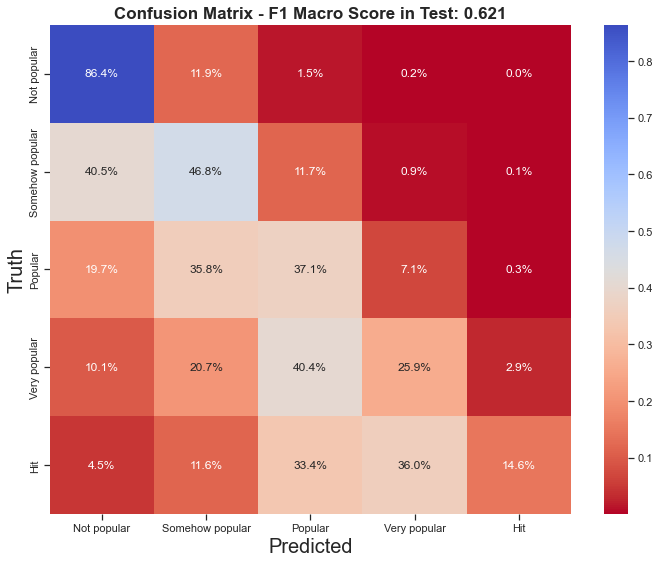

In [67]:
confuxion_matrix_trains(predictions=predictions_knn2,scores_loaded=knearest_scores_loaded2,y_train=y_test2)

### II. Random Forest

#### a. Even distribution

In [68]:
from sklearn.ensemble import RandomForestClassifier
#A. Create simple instance
randomforest=RandomForestClassifier(random_state=1,n_estimators=10) #n stimators is how many trees the forest would contain (there are a lot of interesting parameters like number of features = check documentation or see Gridsearch)
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [69]:
# start_time = time.time()
# #C. Cross validation
# randomforest_score1 = cross_val_score(randomforest, x_train1, y_train1, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_randomforest1 = end_time - start_time

In [70]:
# # D. Fit (Cross val score does not fit the model)
# randomforest.fit(x_train1,y_train1)
# # E. Predict
# predictions_rf1=randomforest.predict(x_test1) #With test

In [71]:
# # Save the trained model
# joblib.dump(randomforest, 'randomforest1_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('randomforest1_scores.csv', randomforest_score1, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_rf1.pkl', 'wb') as file:
#     pickle.dump(predictions_rf1, file)
# # Save time
# with open('model_time_randomforest1.txt', 'w') as file:
#     file.write(str(model_time_randomforest1))

In [72]:
# Load the saved model
randomforest1_loaded = joblib.load('randomforest1_model.pkl')
# Load the saved scores
randomforest_score1_loaded = np.loadtxt('randomforest1_scores.csv', delimiter=',')
# Load the predictions
with open('predictions_rf1.pkl', 'rb') as file:
    predictions_rf1 = pickle.load(file)
# Load time spent in training cv
with open('model_time_randomforest1.txt', 'r') as file:
    model_time_randomforest1 = file.read()
model_time_randomforest1 = float(model_time_randomforest1)  # Convert the string back to an integer if needed
print(model_time_randomforest1)

42.141801834106445


In [73]:
#Results
RF1_Results=results_cv(scores=randomforest_score1_loaded,name='RF',time=model_time_randomforest1,typeproblem=1)
RF1_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,RF,1,0.497514,0.000074,42.14


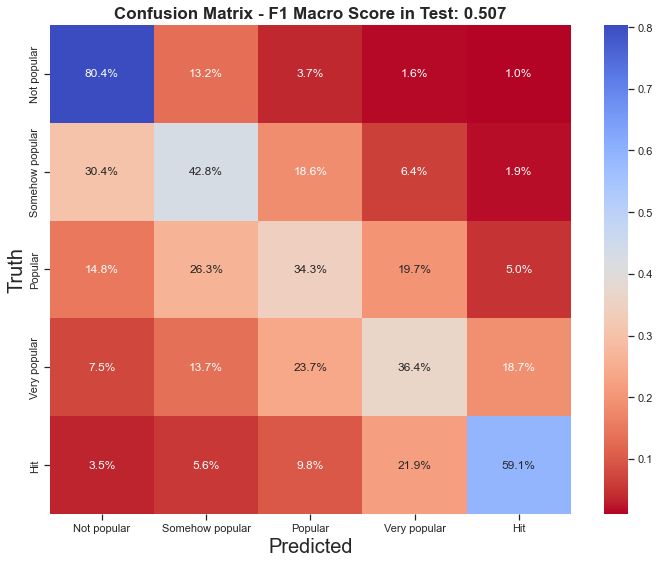

In [74]:
confuxion_matrix_trains(predictions=predictions_rf1,scores_loaded=randomforest_score1_loaded,y_train=y_test1)

#### B. Uneven distribution (expert cutoff)

In [75]:
#A. Create simple instance
randomforest2=RandomForestClassifier(random_state=1,n_estimators=10) #n stimators is how many trees the forest would contain (there are a lot of interesting parameters like number of features = check documentation or see Gridsearch)
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [76]:
# start_time = time.time()
# #C. Cross validation
# randomforest_score2 = cross_val_score(randomforest2, x_train2, y_train2, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_randomforest2 = end_time - start_time

In [77]:
# # D. Fit (Cross val score does not fit the model)
# randomforest2.fit(x_train2,y_train2)
# # E. Predict
# predictions_rf2=randomforest2.predict(x_test2) 

In [78]:
# # Save the trained model
# joblib.dump(randomforest2, 'randomforest2_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('randomforest2_scores.csv', randomforest_score2, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_rf2.pkl', 'wb') as file:
#     pickle.dump(predictions_rf2, file)
# # Save time
# with open('model_time_randomforest2.txt', 'w') as file:
#     file.write(str(model_time_randomforest2))

In [79]:
# Load the saved model
randomforest2_loaded = joblib.load('randomforest2_model.pkl')
# Load the saved scores
randomforest_score2_loaded = np.loadtxt('randomforest2_scores.csv', delimiter=',')
# Load the predictions
with open('predictions_rf2.pkl', 'rb') as file:
    predictions_rf2 = pickle.load(file)
# Load time spent in training cv
with open('model_time_randomforest2.txt', 'r') as file:
    model_time_randomforest2 = file.read()
model_time_randomforest2 = float(model_time_randomforest2)  # Convert the string back to an integer if needed
print(model_time_randomforest2)

41.20094323158264


In [80]:
#Results
RF2_Results=results_cv(scores=randomforest_score2_loaded,name='RF',time=model_time_randomforest2,typeproblem=2)
RF2_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,RF,2,0.460581,0.004065,41.2


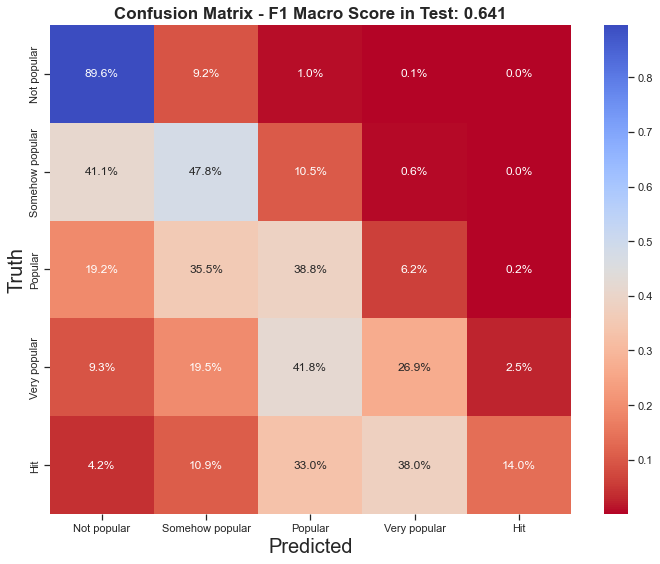

In [81]:
confuxion_matrix_trains(predictions=predictions_rf2,scores_loaded=randomforest_score2_loaded,y_train=y_test2)

### III. Naive Bayes Classifier (Gaussian Naives Classifier since we have a mix of categorical and numerical data)

#### a. Even distribution

In [82]:
from sklearn.naive_bayes import GaussianNB
#Create a simple instance
gnb1 = GaussianNB() #If you have a combination of continuous and discrete features, you might consider using a more flexible classifier that can handle both types of features simultaneously. One such classifier is the Gaussian Naive Bayes (GNB) 
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [83]:
# start_time = time.time()
# #C. Cross validation
# gnb_score1 = cross_val_score(gnb1, x_train1, y_train1, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_gnb1 = end_time - start_time

In [84]:
# # D. Fit (Cross val score does not fit the model)
# gnb1.fit(x_train1,y_train1)
# # E. Predict
# predictions_gnb1=gnb1.predict(x_test1) #With test

In [85]:
# # Save the trained model
# joblib.dump(gnb1, 'gnb1_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('gnb_score1.csv', gnb_score1, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_gnb1.pkl', 'wb') as file:
#     pickle.dump(predictions_gnb1, file)
# # Save time
# with open('model_time_gnb1.txt', 'w') as file:
#     file.write(str(model_time_gnb1))

In [86]:
# Load the saved model
gnb1_model_loaded = joblib.load('gnb1_model.pkl')
# Load the saved scores
gnb_score1_loaded = np.loadtxt('gnb_score1.csv', delimiter=',')
# Load the predictions
with open('predictions_gnb1.pkl', 'rb') as file:
    predictions_gnb1 = pickle.load(file)
# Load time spent in training cv
with open('model_time_gnb1.txt', 'r') as file:
    model_time_gnb1 = file.read()
model_time_gnb1 = float(model_time_gnb1)  # Convert the string back to an integer if needed
print(model_time_gnb1)

5.837920188903809


In [87]:
#Results
GNB1_Results=results_cv(scores=gnb_score1_loaded,name='GNB',time=model_time_gnb1,typeproblem=1)
GNB1_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,GNB,1,0.333865,0.002096,5.84


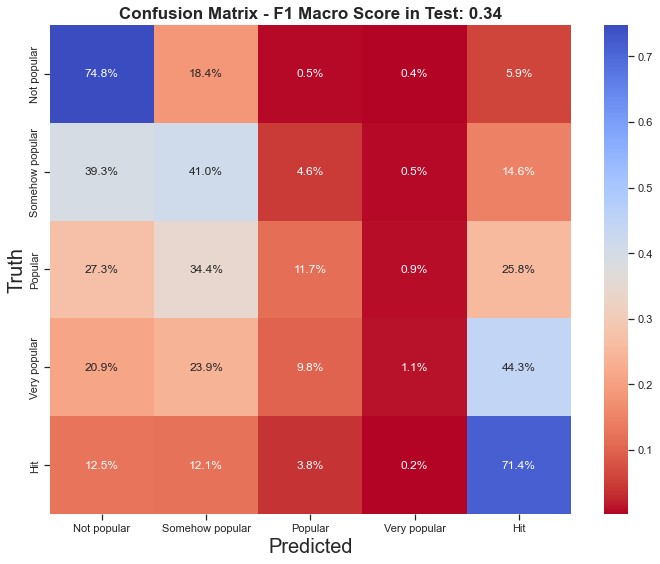

In [88]:
confuxion_matrix_trains(predictions=predictions_gnb1,scores_loaded=gnb_score1_loaded,y_train=y_test1)

#### B. Uneven distribution (expert cutoff)

In [89]:
from sklearn.naive_bayes import GaussianNB
#Create a simple instance
gnb2 = GaussianNB() #If you have a combination of continuous and discrete features, you might consider using a more flexible classifier that can handle both types of features simultaneously. One such classifier is the Gaussian Naive Bayes (GNB) 
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [90]:
# start_time = time.time()
# #C. Cross validation
# gnb_score2 = cross_val_score(gnb2, x_train2, y_train2, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_gnb2 = end_time - start_time

In [91]:
# # D. Fit (Cross val score does not fit the model)
# gnb2.fit(x_train2,y_train2)
# # E. Predict
# predictions_gnb2=gnb2.predict(x_test2) #With test

In [92]:
# # Save the trained model
# joblib.dump(gnb2, 'gnb2_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('gnb_score2.csv', gnb_score2, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_gnb2.pkl', 'wb') as file:
#     pickle.dump(predictions_gnb2, file)
# # Save time
# with open('model_time_gnb2.txt', 'w') as file:
#     file.write(str(model_time_gnb2))

In [93]:
# Load the saved model
gnb2_model_loaded = joblib.load('gnb2_model.pkl')
# Load the saved scores
gnb_score2_loaded = np.loadtxt('gnb_score2.csv', delimiter=',')
# Load the predictions
with open('predictions_gnb2.pkl', 'rb') as file:
    predictions_gnb2 = pickle.load(file)
# Load time spent in training cv
with open('model_time_gnb2.txt', 'r') as file:
    model_time_gnb2 = file.read()
model_time_gnb2 = float(model_time_gnb2)  # Convert the string back to an integer if needed
print(model_time_gnb2)

5.734289169311523


In [94]:
#Results
GNB2_Results=results_cv(scores=gnb_score2_loaded,name='GNB',time=model_time_gnb2,typeproblem=2)
GNB2_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,GNB,2,0.201026,0.001661,5.73


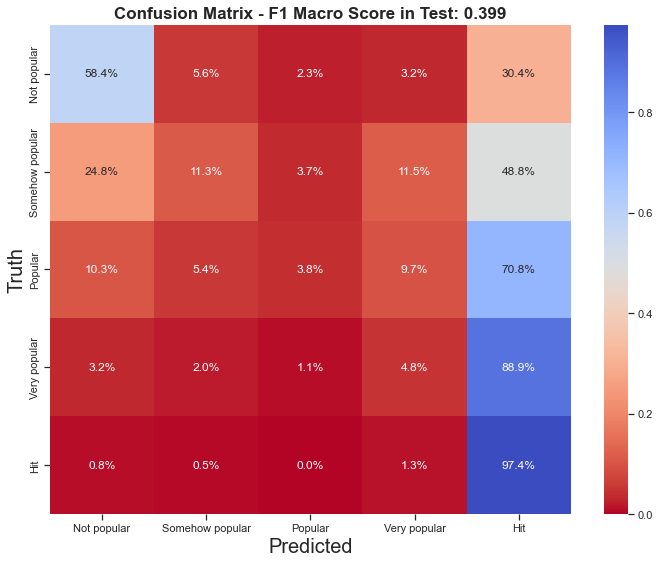

In [95]:
confuxion_matrix_trains(predictions=predictions_gnb2,scores_loaded=gnb_score2_loaded,y_train=y_test2)

### V. Gradient Boosting Classifier

#### a. Even distribution

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
#A. Create simple instance
gboost1 = GradientBoostingClassifier(n_estimators=100 #Number of threes
                                     , learning_rate=0.1, 
                                     random_state=42,
                                     n_iter_no_change=5,
                                     tol=0.05,
                                    validation_fraction=0.2)
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [97]:
# start_time = time.time()
# #C. Cross validation
# gboost1_score1 = cross_val_score(gboost1, x_train1, y_train1, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_gboost1 = end_time - start_time

In [98]:
# # D. Fit (Cross val score does not fit the model)
# gboost1.fit(x_train1,y_train1)
# # E. Predict
# predictions_gboost1=gboost1.predict(x_test1) #With test

In [99]:
# # Save the trained model
# joblib.dump(gboost1, 'gboost1_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('gboost1_scores.csv', gboost1_score1, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_gboost1.pkl', 'wb') as file:
#     pickle.dump(predictions_gboost1, file)
# # Save time
# with open('model_time_gboost1.txt', 'w') as file:
#     file.write(str(model_time_gboost1))

In [100]:
# Load the saved model
gboost1_loaded = joblib.load('gboost1_model.pkl')
# Load the saved scores
gboost1_score1_loaded = np.loadtxt('gboost1_scores.csv', delimiter=',')
# Load the predictions
with open('predictions_gboost1.pkl', 'rb') as file:
    predictions_gboost1 = pickle.load(file)
# Load time spent in training cv
with open('model_time_gboost1.txt', 'r') as file:
    model_time_gboost1 = file.read()
model_time_gboost1 = float(model_time_gboost1)  # Convert the string back to an integer if needed
print(model_time_gboost1)

271.7155113220215


In [101]:
#Results
GBOOST1_Results=results_cv(scores=gboost1_score1_loaded,name='GBOOST',time=model_time_gboost1,typeproblem=1)
GBOOST1_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,GBOOST,1,0.355357,0.003409,271.72


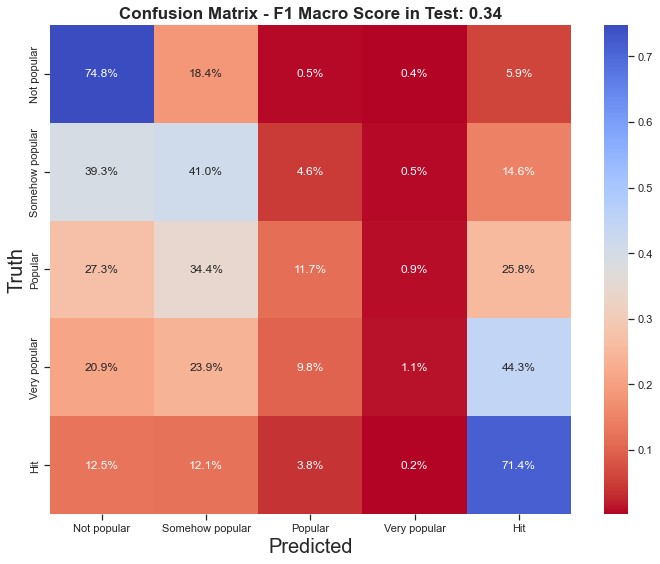

In [102]:
confuxion_matrix_trains(predictions=predictions_gnb1,scores_loaded=gboost1_score1_loaded,y_train=y_test1)

#### B. Uneven distribution (expert cutoff)

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
#A. Create simple instance
gboost2 = GradientBoostingClassifier(n_estimators=100 #Number of threes
                                     , learning_rate=0.1, 
                                     random_state=42,
                                     n_iter_no_change=5,
                                     tol=0.05,
                                    validation_fraction=0.2,
                                     max_depth=5,#How depth the threes can grow
                                     min_impurity_decrease=0.2) #What is the minimu impurity decrease accepted
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [104]:
# start_time = time.time()
# #C. Cross validation
# gboost2_score1 = cross_val_score(gboost2, x_train2, y_train2, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_gboost2 = end_time - start_time

In [105]:
# # D. Fit (Cross val score does not fit the model)
# gboost2.fit(x_train2,y_train2)
# # E. Predict
# predictions_gboost2=gboost2.predict(x_test2) #With test

In [106]:
# # Save the trained model
# joblib.dump(gboost2, 'gboost2_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('gboost2_scores.csv', gboost2_score1, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_gboost2.pkl', 'wb') as file:
#     pickle.dump(predictions_gboost2, file)
# # Save time
# with open('model_time_gboost2.txt', 'w') as file:
#     file.write(str(model_time_gboost2))

In [107]:
# Load the saved model
gboost2_loaded = joblib.load('gboost2_model.pkl')
# Load the saved scores
gboost2_score1_loaded = np.loadtxt('gboost2_scores.csv', delimiter=',')
# Load the predictions
with open('predictions_gboost2.pkl', 'rb') as file:
    predictions_gboost2 = pickle.load(file)
# Load time spent in training cv
with open('model_time_gboost2.txt', 'r') as file:
    model_time_gboost2 = file.read()
model_time_gboost2 = float(model_time_gboost2)  # Convert the string back to an integer if needed
print(model_time_gboost2)

334.1831967830658


In [108]:
#Results
GBOOST2_Results=results_cv(scores=gboost2_score1_loaded,name='GBOOST',time=model_time_gboost2,typeproblem=2)
GBOOST2_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,GBOOST,2,0.338256,0.005818,334.18


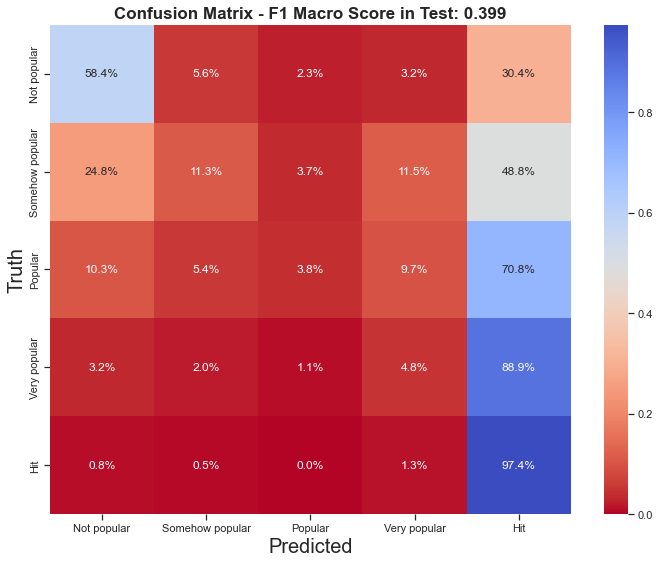

In [109]:
confuxion_matrix_trains(predictions=predictions_gnb2,scores_loaded=gboost2_score1_loaded,y_train=y_test2)

### VI. ADA Boost - Trees (Adaptative Boosting)


#### a. Even distribution

In [110]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#A. Create simple instance
# In this case it seems that we also need to create a simple tree-Create a base classifier (weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost1 = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42) #base_estimator is the model that we want to fit. Actually, decision tree is the defaul (we could have not included that part) but we can use different estimators such as logistic regression

In [111]:
# start_time = time.time()
# #C. Cross validation
# adaboost1_score1 = cross_val_score(adaboost1, x_train1, y_train1, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_adaboost1 = end_time - start_time

In [112]:
# # D. Fit (Cross val score does not fit the model)
# adaboost1.fit(x_train1,y_train1)
# # E. Predict
# predictions_adaboost1=adaboost1.predict(x_test1) #With test

In [113]:
# # Save the trained model
# joblib.dump(adaboost1, 'adaboost1_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('adaboost1_scores.csv', adaboost1_score1, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_adaboost1.pkl', 'wb') as file:
#     pickle.dump(predictions_adaboost1, file)
# # Save time
# with open('model_time_adaboost1.txt', 'w') as file:
#     file.write(str(model_time_adaboost1))

In [114]:
# Load the saved model
adaboost1_loaded = joblib.load('adaboost1_model.pkl')
# Load the saved scores
adaboost1_score1_loaded = np.loadtxt('adaboost1_scores.csv', delimiter=',')
# Load the predictions
with open('predictions_adaboost1.pkl', 'rb') as file:
    predictions_adaboost1 = pickle.load(file)
# Load time spent in training cv
with open('model_time_adaboost1.txt', 'r') as file:
    model_time_adaboost1 = file.read()
model_time_adaboost1 = float(model_time_adaboost1)  # Convert the string back to an integer if needed
print(model_time_adaboost1)

97.90438771247864


In [115]:
#Results
ADABOOST1_Results=results_cv(scores=adaboost1_score1_loaded,name='ADA',time=model_time_adaboost1,typeproblem=1)
ADABOOST1_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,ADA,1,0.438242,0.005105,97.9


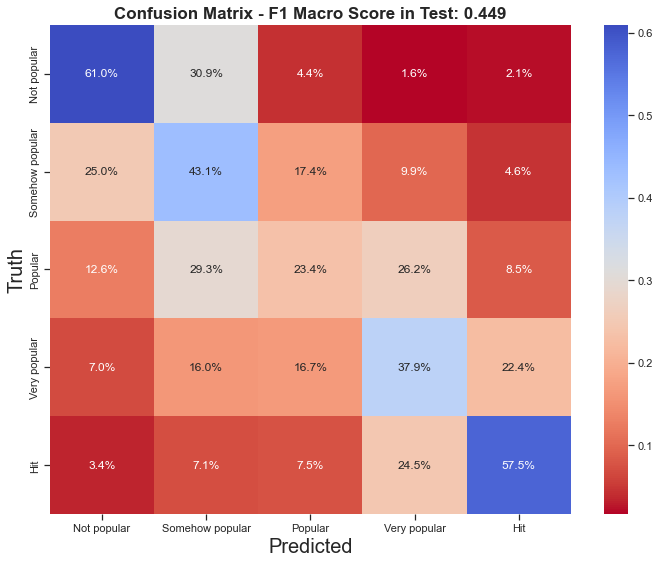

In [116]:
confuxion_matrix_trains(predictions=predictions_adaboost1,scores_loaded=adaboost1_score1_loaded,y_train=y_test1)

#### B. Uneven distribution (expert cutoff)

In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#A. Create simple instance
# In this case it seems that we also need to create a simple tree-Create a base classifier (weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost2 = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

In [118]:
# start_time = time.time()
# #C. Cross validation
# adaboost1_score2 = cross_val_score(adaboost2, x_train2, y_train2, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_adaboost2 = end_time - start_time

In [119]:
# # D. Fit (Cross val score does not fit the model)
# adaboost2.fit(x_train2,y_train2)
# # E. Predict
# predictions_adaboost2=adaboost2.predict(x_test2) #With test

In [120]:
# # Save the trained model
# joblib.dump(adaboost2, 'adaboost2_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('adaboost2_scores.csv', adaboost1_score2, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_adaboost2.pkl', 'wb') as file:
#     pickle.dump(predictions_adaboost2, file)
# # Save time
# with open('model_time_adaboost2.txt', 'w') as file:
#     file.write(str(model_time_adaboost2))

In [121]:
# Load the saved model
adaboost2_loaded = joblib.load('adaboost2_model.pkl')
# Load the saved scores
adaboost1_score2_loaded = np.loadtxt('adaboost2_scores.csv', delimiter=',')
# Load the predictions
with open('predictions_adaboost2.pkl', 'rb') as file:
    predictions_adaboost2 = pickle.load(file)
# Load time spent in training cv
with open('model_time_adaboost2.txt', 'r') as file:
    model_time_adaboost2 = file.read()
model_time_adaboost2 = float(model_time_adaboost2)  # Convert the string back to an integer if needed
print(model_time_adaboost2)

94.99878454208374


In [122]:
#Results
ADABOOST2_Results=results_cv(scores=adaboost1_score2_loaded,name='ADA',time=model_time_adaboost2,typeproblem=2)
ADABOOST2_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,ADA,2,0.379736,0.002969,95.0


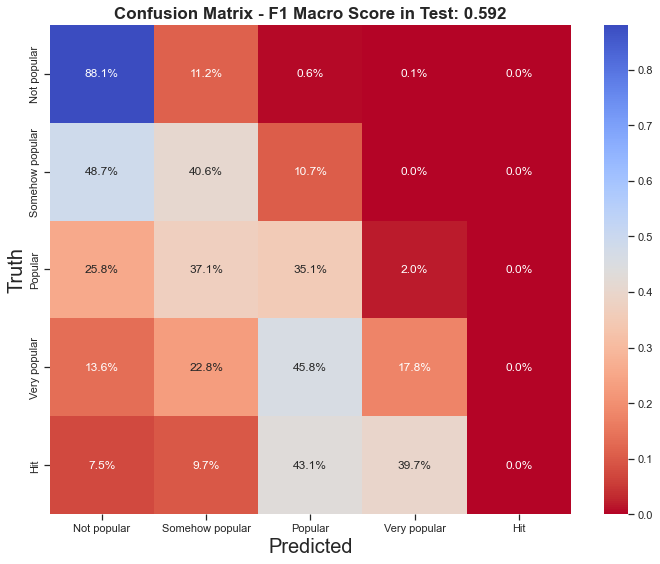

In [123]:
confuxion_matrix_trains(predictions=predictions_adaboost2,scores_loaded=adaboost1_score2_loaded,y_train=y_test2)

### VI. ADA Boost - Logistic (Adaptative Boosting)


#### a. Even distribution

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
#A. Create simple instance
# In this case it seems that we also need to create a simple tree-Create a base classifier (weak learner)
base_classifier = LogisticRegression(max_iter=1000)
adaboostlr1 = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

###### Why not adjust to multinomial LR?

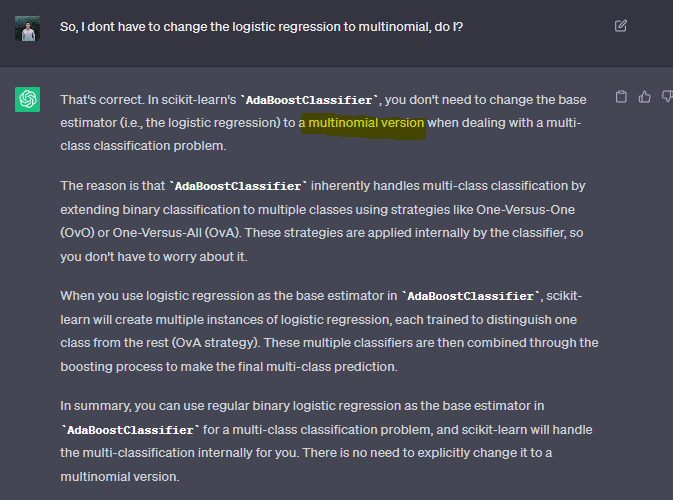

###### To consider
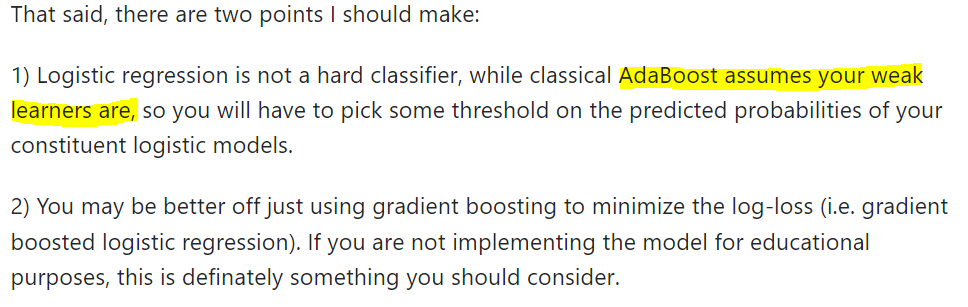

In [125]:
# start_time = time.time()
# #C. Cross validation
# adaboostlr1_score1 = cross_val_score(adaboostlr1, x_train1, y_train1, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_adaboostlr1 = end_time - start_time

In [126]:
# # D. Fit (Cross val score does not fit the model)
# adaboostlr1.fit(x_train1,y_train1)
# # E. Predict
# predictions_adaboostlr1=adaboostlr1.predict(x_test1) #With test

In [127]:
# # Save the trained model
# joblib.dump(adaboostlr1, 'adaboostlr1_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('adaboostlr1_scores.csv', adaboostlr1_score1, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_adaboostlr1.pkl', 'wb') as file:
#     pickle.dump(predictions_adaboostlr1, file)
# # Save time
# with open('model_time_adaboostlr1.txt', 'w') as file:
#     file.write(str(model_time_adaboostlr1))

In [128]:
# Load the saved model
adaboostlr1_loaded = joblib.load('adaboostlr1_model.pkl')
# Load the saved scores
adaboostlr1_score1_loaded = np.loadtxt('adaboostlr1_scores.csv', delimiter=',')
# Load the predictions
with open('predictions_adaboostlr1.pkl', 'rb') as file:
    predictions_adaboostlr1 = pickle.load(file)
# Load time spent in training cv
with open('model_time_adaboostlr1.txt', 'r') as file:
    model_time_adaboostlr1 = file.read()
model_time_adaboostlr1 = float(model_time_adaboostlr1)  # Convert the string back to an integer if needed
print(model_time_adaboostlr1)

181.74241590499878


In [129]:
#Results
ADABOOSTLR1_Results=results_cv(scores=adaboostlr1_score1_loaded,name='ADA Logistic',time=model_time_adaboostlr1,typeproblem=1)
ADABOOSTLR1_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,ADA Logistic,1,0.350991,0.000367,181.74


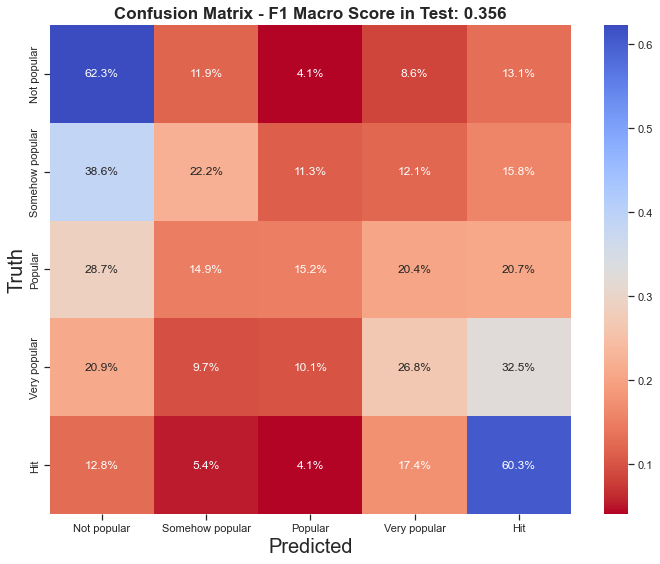

In [130]:
confuxion_matrix_trains(predictions=predictions_adaboostlr1,scores_loaded=adaboostlr1_score1_loaded,y_train=y_test1)

#### B. Uneven distribution (expert cutoff)

In [131]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
#A. Create simple instance
# In this case it seems that we also need to create a simple tree-Create a base classifier (weak learner)
base_classifier = LogisticRegression(max_iter=1000)
adaboostlr2 = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

In [132]:
# start_time = time.time()
# #C. Cross validation
# adaboostlr2_score2 = cross_val_score(adaboostlr2, x_train2, y_train2, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_adaboostlr2 = end_time - start_time

In [133]:
# # D. Fit (Cross val score does not fit the model)
# adaboostlr2.fit(x_train2,y_train2)
# # E. Predict
# predictions_adaboostlr2=adaboostlr2.predict(x_test2) #With test

In [134]:
# # Save the trained model
# joblib.dump(adaboostlr2, 'adaboostlr2_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('adaboostlr2_scores.csv', adaboostlr2_score2, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_adaboostlr2.pkl', 'wb') as file:
#     pickle.dump(predictions_adaboostlr2, file)
# # Save time
# with open('model_time_adaboostlr2.txt', 'w') as file:
#     file.write(str(model_time_adaboostlr2))

In [135]:
# Load the saved model
adaboostlr2_loaded = joblib.load('adaboostlr2_model.pkl')
# Load the saved scores
adaboostlr2_score2_loaded = np.loadtxt('adaboostlr2_scores.csv', delimiter=',')
# Load the predictions
with open('predictions_adaboostlr2.pkl', 'rb') as file:
    predictions_adaboostlr2 = pickle.load(file)
# Load time spent in training cv
with open('model_time_adaboostlr2.txt', 'r') as file:
    model_time_adaboostlr2 = file.read()
model_time_adaboostlr2 = float(model_time_adaboostlr2)  # Convert the string back to an integer if needed
print(model_time_adaboostlr2)

224.16154313087463


In [136]:
#Results
ADABOOSTLR2_Results=results_cv(scores=adaboostlr2_score2_loaded,name='ADA Logistic',time=model_time_adaboostlr2,typeproblem=2)
ADABOOSTLR2_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,ADA Logistic,2,0.255216,0.000515,224.16


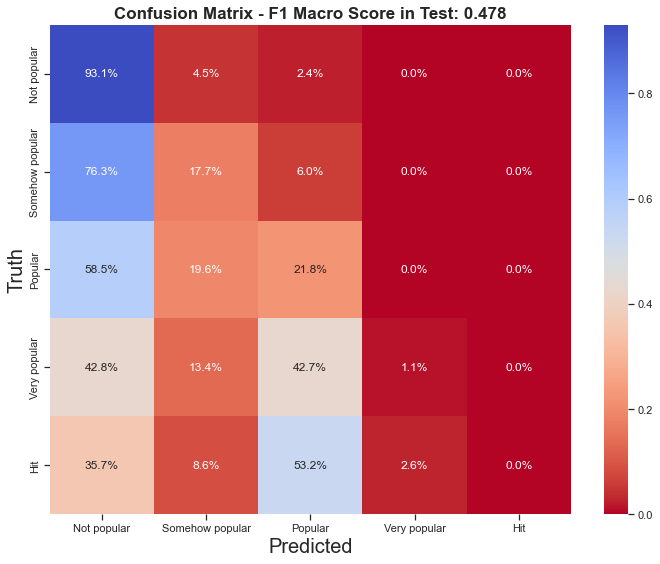

In [137]:
confuxion_matrix_trains(predictions=predictions_adaboostlr2,scores_loaded=adaboostlr2_score2_loaded,y_train=y_test2)

### III. Suport Vector Machine (Linear)

#### a. Even distribution

In [138]:
from sklearn import svm
#A. Create simple instance
svm1=svm.LinearSVC()

In [139]:
# start_time = time.time()
# #C. Cross validation
# svm_score1 = cross_val_score(svm1, x_train1, y_train1, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_svm1 = end_time - start_time

In [140]:
# # D. Fit (Cross val score does not fit the model)
# svm1.fit(x_train1,y_train1)
# # E. Predict
# predictions_svm1=svm1.predict(x_test1) #Not with Test - We save that plot until the end

In [141]:
# # Save the trained model
# joblib.dump(svm1, 'svm1_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('svm_score1.csv', svm_score1, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_svm1.pkl', 'wb') as file:
#     pickle.dump(predictions_svm1, file)
# # Save time
# with open('model_time_svm1.txt', 'w') as file:
#     file.write(str(model_time_svm1))

In [142]:
# Load the saved model
svm1_loaded = joblib.load('svm1_model.pkl')
# Load the saved scores
svm_score1_loaded = np.loadtxt('svm_score1.csv', delimiter=',')
# Load the predictions
with open('predictions_svm1.pkl', 'rb') as file:
    predictions_svm1 = pickle.load(file)
# Load time spent in training cv
with open('model_time_svm1.txt', 'r') as file:
    model_time_svm1 = file.read()
model_time_svm1 = float(model_time_svm1)  # Convert the string back to an integer if needed
print(model_time_svm1)

971.0329174995422


In [143]:
#Results
SVM1_Results=results_cv(scores=svm_score1_loaded,name='SVM',time=model_time_svm1,typeproblem=1)
SVM1_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,SVM,1,0.443583,0.000347,971.03


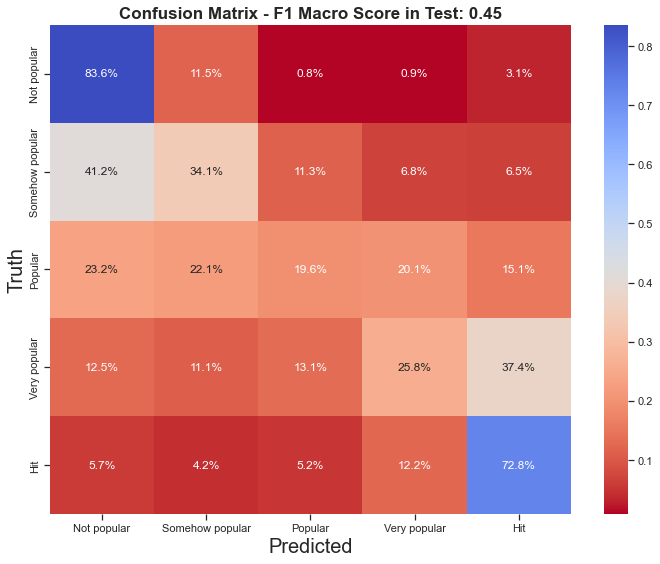

In [144]:
confuxion_matrix_trains(predictions=predictions_svm1,scores_loaded=svm_score1_loaded,y_train=y_test1)

#### B. Uneven distribution (expert cutoff)

In [145]:
from sklearn import svm
#A. Create simple instance
svm2=svm.LinearSVC()

In [146]:
# start_time = time.time()
# #C. Cross validation
# svm_score2 = cross_val_score(svm2, x_train2, y_train2, cv=kfold,n_jobs=5,scoring='f1_macro')
# #Time
# end_time = time.time()
# model_time_svm2 = end_time - start_time

In [147]:
# # D. Fit (Cross val score does not fit the model)
# svm2.fit(x_train2,y_train2)
# # E. Predict
# predictions_svm2=svm2.predict(x_test2) #Not with Test - We save that plot until the end

In [148]:
# # Save the trained model
# joblib.dump(svm2, 'svm2_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('svm_score2.csv', svm_score2, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_svm2.pkl', 'wb') as file:
#     pickle.dump(predictions_svm2, file)
# # Save time
# with open('model_time_svm2.txt', 'w') as file:
#     file.write(str(model_time_svm2))

In [149]:
# Load the saved model
svm2_loaded = joblib.load('svm2_model.pkl')
# Load the saved scores
svm_score2_loaded = np.loadtxt('svm_score2.csv', delimiter=',')
# Load the predictions
with open('predictions_svm2.pkl', 'rb') as file:
    predictions_svm2 = pickle.load(file)
# Load time spent in training cv
with open('model_time_svm2.txt', 'r') as file:
    model_time_svm2 = file.read()
model_time_svm2 = float(model_time_svm2)  # Convert the string back to an integer if needed
print(model_time_svm2)

760.1935338973999


In [150]:
#Results
SVM2_Results=results_cv(scores=svm_score2_loaded,name='SVM',time=model_time_svm2,typeproblem=2)
SVM2_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,SVM,2,0.376703,0.000478,760.19


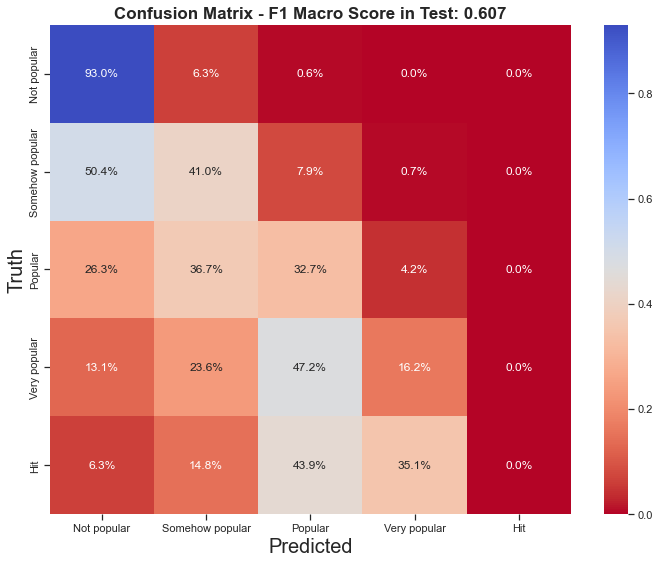

In [151]:
confuxion_matrix_trains(predictions=predictions_svm2,scores_loaded=svm_score2_loaded,y_train=y_test2)

### VII. XG-Boost

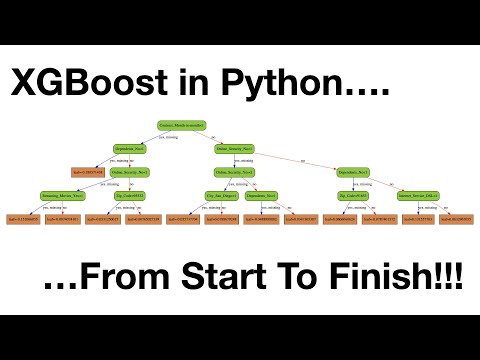

In [152]:
statquest_video=YouTubeVideo('GrJP9FLV3FE',height=600,width=850,start=1)
display(statquest_video)

In [153]:
#Confirm no missing values in the ys
has_nan0= y_train1.isna().any()
has_nan1 = y_test1.isna().any()
has_nan2=y_train2.isna().any()
has_nan3=y_test2.isna().any()
print(has_nan0,has_nan1,has_nan2,has_nan3)

False False False False


In [154]:
#XGBOOST Requires some transformation  in our y targes. Do not accept category but just numeric inputs
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#Even distribution
y_train1_xgb = label_encoder.fit_transform(y_train1)
y_test1_xgb = label_encoder.fit_transform(y_test1)
#Expert cutoff
y_train2_xgb = label_encoder.fit_transform(y_train2)
y_test2_xgb = label_encoder.fit_transform(y_test2)

In [155]:
y_train2_xgb

array([2, 0, 0, ..., 0, 2, 2], dtype=int64)

In [156]:
#The types are different. For example
print(y_train1.dtype, 'And',y_train1_xgb.dtype)

category And int64


#### a. Even distribution

In [157]:
import xgboost as xgb #XBG is not part of the package of sklearn
#A. Create simple instance
xgb1 = xgb.XGBClassifier()
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [158]:
# start_time = time.time()
# #C. Cross validation
# xgb_score1 = cross_val_score(xgb1, x_train1, y_train1_xgb, cv=kfold,n_jobs=5,scoring='f1_macro',error_score="raise") #Interesting to notice that when scoring is accuracy the final result is nan.
# #Time
# end_time = time.time()
# model_time_xgb1 = end_time - start_time

In [159]:
# # D. Fit (Cross val score does not fit the model)
# xgb1.fit(x_train1,y_train1_xgb)
# # E. Predict
# predictions_xgb1=xgb1.predict(x_test1) #Not with Test - We save that plot until the end

In [160]:
# # Save the trained model
# joblib.dump(xgb1, 'xgb1_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('xgb_score1.csv', xgb_score1, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_xgb1.pkl', 'wb') as file:
#     pickle.dump(predictions_xgb1, file)
# # Save time
# with open('model_time_xgb1.txt', 'w') as file:
#     file.write(str(model_time_xgb1))

In [161]:
# Load the saved model
xgb1_loaded = joblib.load('xgb1_model.pkl')
# Load the saved scores
xgb_score1_loaded = np.loadtxt('xgb_score1.csv', delimiter=',')
# Load the predictions
with open('predictions_xgb1.pkl', 'rb') as file:
    predictions_xgb1 = pickle.load(file)
# Load time spent in training cv
with open('model_time_xgb1.txt', 'r') as file:
    model_time_xgb1 = file.read()
model_time_xgb1 = float(model_time_xgb1)  # Convert the string back to an integer if needed
print(model_time_xgb1)

598.8451852798462


In [162]:
#Just to confirm no nan values results during the cross validation
print('Scores:',xgb_score1_loaded,"\nTime: ",model_time_xgb1)

Scores: [0.51794126 0.51846946 0.51864045] 
Time:  598.8451852798462


In [163]:
#Results
XGB1_Results=results_cv(scores=xgb_score1_loaded,name='XGBOOST',time=model_time_xgb1,typeproblem=1)
XGB1_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,XGBOOST,1,0.51835,0.000298,598.85


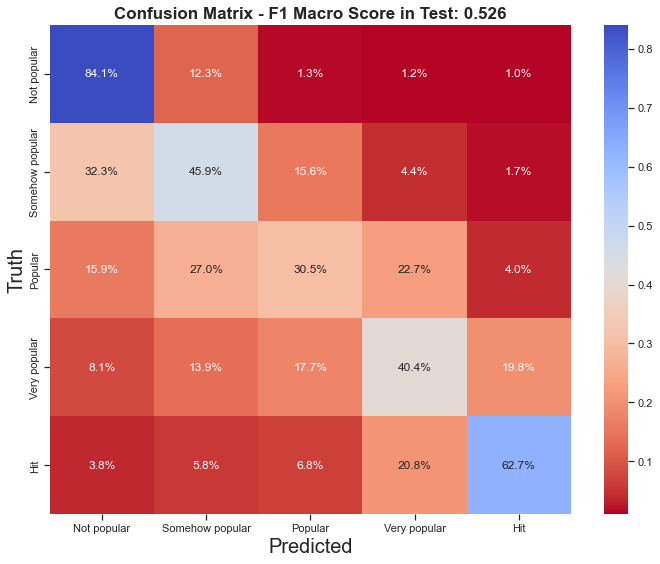

In [164]:
confuxion_matrix_trains(predictions=predictions_xgb1,scores_loaded=xgb_score1_loaded,y_train=y_test1_xgb) #Notice that the test is the xgb format

#### B. Uneven distribution (expert cutoff)

In [165]:
import xgboost as xgb #XBG is not part of the package of sklearn
#A. Create simple instance
xgb2 = xgb.XGBClassifier()
#B. Stratified results (to keep proportions of classes in the posterior cv)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [166]:
#To avoid problem "feature_names must be unique"
#Train
y_train2_xgb=pd.DataFrame(y_train2_xgb)
y_train2_xgb = y_train2_xgb.loc[:,~y_train2_xgb.columns.duplicated()]
y_train2_xgb=np.array(y_train2_xgb)
y_train2_xgb=y_train2_xgb.flatten()
#Test
y_test2_xgb=pd.DataFrame(y_test2_xgb)
y_test2_xgb = y_test2_xgb.loc[:,~y_test2_xgb.columns.duplicated()]
y_test2_xgb=np.array(y_test2_xgb)
y_test2_xgb=y_test2_xgb.flatten()

In [167]:
x_train2_copy = copy.deepcopy(x_train2)
x_test2_copy = copy.deepcopy(x_test2)
x_train2_copy.columns = range(x_train2_copy.shape[1]) #There was a problem "feature_names must be unique" - With this we avoid that since each column would have assigned a particular number
x_test2_copy.columns = range(x_test2_copy.shape[1])

In [168]:
# start_time = time.time()
# #C. Cross validation
# xgb_score2 = cross_val_score(xgb2, x_train2_copy, y_train2_xgb, cv=kfold,n_jobs=5,scoring='f1_macro',error_score="raise") #Interesting to notice that when scoring is accuracy the final result is nan.
# #Time
# end_time = time.time()
# model_time_xgb2 = end_time - start_time

In [169]:
# # D. Fit (Cross val score does not fit the model)
# xgb2.fit(x_train2_copy,y_train2_xgb)
# # E. Predict
# predictions_xgb2=xgb2.predict(x_test2_copy) #Not with Test - We save that plot until the end

In [170]:
# # Save the trained model
# joblib.dump(xgb2, 'xgb2_model.pkl') #It will be in the current directory
# # Save the scores to a CSV file
# np.savetxt('xgb_score2.csv', xgb_score2, delimiter=',')#It will be in the current directory
# # Save the list of predictions
# with open('predictions_xgb2.pkl', 'wb') as file:
#     pickle.dump(predictions_xgb2, file)
# # Save time
# with open('model_time_xgb2.txt', 'w') as file:
#     file.write(str(model_time_xgb2))

In [171]:
# Load the saved model
xgb2_loaded = joblib.load('xgb2_model.pkl')
# Load the saved scores
xgb_score2_loaded = np.loadtxt('xgb_score2.csv', delimiter=',')
# Load the predictions
with open('predictions_xgb2.pkl', 'rb') as file:
    predictions_xgb2 = pickle.load(file)
# Load time spent in training cv
with open('model_time_xgb2.txt', 'r') as file:
    model_time_xgb2 = file.read()
model_time_xgb2 = float(model_time_xgb2)  # Convert the string back to an integer if needed
print(model_time_xgb2)

604.2109701633453


In [172]:
#Just to confirm no nan values results during the cross validation
print('Scores:',xgb_score2_loaded,"\nTime: ",model_time_xgb2)

Scores: [0.49282406 0.48628732 0.49445088] 
Time:  604.2109701633453


In [173]:
#Results
XGB2_Results=results_cv(scores=xgb_score2_loaded,name='XGBOOST',time=model_time_xgb2,typeproblem=2)
XGB2_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,XGBOOST,2,0.491187,0.003528,604.21


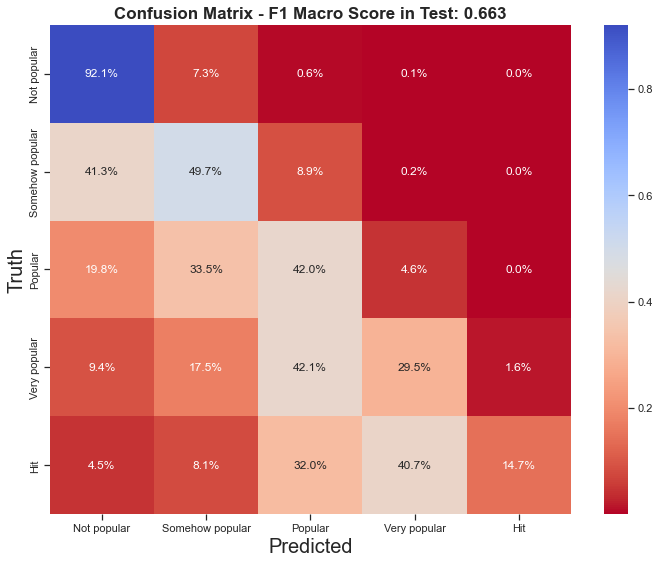

In [174]:
confuxion_matrix_trains(predictions=predictions_xgb2,scores_loaded=xgb_score2_loaded,y_train=y_test2_xgb) #Notice that the test is the xgb format

### VIII. Artificial Neural Network

#### a. Even distribution

In [175]:
import tensorflow as tf
#!pip install tensorflow-addons
import tensorflow_addons as tfa #We dont use it at the end, but is good to know is a library that increase the number of metric options for tensorflow
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#A. Create the model (just one layer to begin with)
ann1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(94,)), #94 because is the number of features (columns) of every sample 
    tf.keras.layers.Dense(5, activation='softmax')  # Multi-class classification, so using softmax activation
])

#B. Compile the model 
ann1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#C. Create some rules to improve training
stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=4,
                                            restore_best_weights=True,
                                            verbose=1,
                                            mode='min') 
rlrop = ReduceLROnPlateau(monitor = 'val_loss', 
                          mode = 'min', 
                          patience = 5, 
                        factor = 0.5, #This is the factor by which the learning rate will be reduced when there is no improvement in the monitored metric. For example, if factor=0.5, the learning rate will be halved (multiplied by 0.5) when the patience condition is met.
                          min_lr = 1e-6, #Remember that smaller steps leads to more accurate improvement but much more time of processing
                          verbose = 1)


In [176]:
# start_time = time.time()
# #D. Train model
# ann1.fit(x_train1,np.double(y_train1_xgb),  #We are using y_train1_xgb format because is not categorical. Also we need to convert it from int to double to fit the necessity of the model. 
#          batch_size=20,epochs=50, #The larger the batchsize, the faster the training
#         verbose=1,validation_split=0.2,
#          callbacks=[stop_early,rlrop],workers=5) 
# end_time = time.time()
# model_time_ann1 = end_time - start_time

In [177]:
#This is the equivalent to the cross validation
#E. Get result for the training process in terms of F1-score macro
ann_y_pred_train = ann1.predict(x_train1)
ann_y_pred_train = np.argmax(ann_y_pred_train, axis=1)  # Convert probabilities to class labels

f1_macro_train = f1_score(y_train1_xgb, ann_y_pred_train, average='macro')
print("F1-score macro:", f1_macro_train)

28995/28995 [==============================] - 26s 881us/step
F1-score macro: 0.16146680177756786


In [178]:
#This is the test - what we will use in the matrix
#F. Get result for the training process in terms of F1-score macro
ann1_y_pred_test = ann1.predict(x_test1)
ann1_y_pred_test = np.argmax(ann1_y_pred_test, axis=1)  # Convert probabilities to class labels

f1_macro_test = f1_score(y_test1_xgb, ann1_y_pred_test, average='macro')
print("F1-score macro:", f1_macro_test)

7249/7249 [==============================] - 8s 1ms/step
F1-score macro: 0.15960590448166706


In [179]:
# #Save the trained model
# joblib.dump(ann1, 'ann1.pkl') #It will be in the current directory
# # Save the score for training 
# with open('f1_macro_train.txt', 'w') as file:
#     file.write(str(f1_macro_train))
# # Save the list of predictions
# with open('ann1_y_pred_test.pkl', 'wb') as file:
#     pickle.dump(ann1_y_pred_test, file)
# # Save time
# with open('model_time_ann1.txt', 'w') as file:
#     file.write(str(model_time_ann1))

In [180]:
%%capture
# Load the saved model
ann1_loaded = joblib.load('ann1.pkl')
# Load the score for training
with open('f1_macro_train.txt', 'r') as file:
    f1_macro_train = file.read()
f1_macro_train = float(f1_macro_train)  # Convert the string back to an integer if needed    
# Load the predictions
with open('ann1_y_pred_test.pkl', 'rb') as file:
    ann1_y_pred_test = pickle.load(file)
# Load time spent in training cv
with open('model_time_ann1.txt', 'r') as file:
    model_time_ann1 = file.read()
model_time_ann1 = float(model_time_ann1)  # Convert the string back to an integer if needed
print(model_time_ann1)

In [181]:
#Results
ANN1_Results=results_cv(scores=f1_macro_train,name='ANN',time=model_time_ann1,typeproblem=1)
ANN1_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,ANN,1,0.526671,0.0,553.47


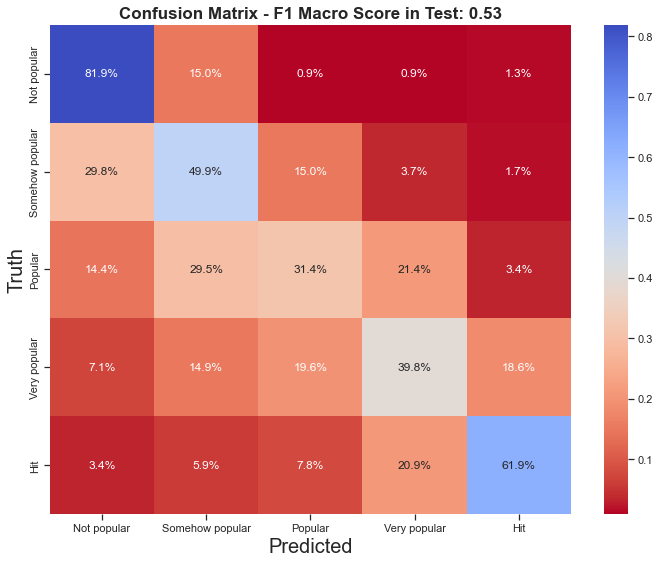

In [182]:
confuxion_matrix_trains(predictions=ann1_y_pred_test,scores_loaded=f1_macro_train,y_train=y_test1_xgb) 

#### B. Uneven distribution (expert cutoff)

In [183]:
import tensorflow as tf
#!pip install tensorflow-addons
import tensorflow_addons as tfa #We dont use it at the end, but is good to know is a library that increase the number of metric options for tensorflow
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#A. Create the model (just one layer to begin with)
ann2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(95,)), #95 because is the number of features (columns) of every sample 
    tf.keras.layers.Dense(5, activation='softmax')  # Multi-class classification, so using softmax activation
])

#B. Compile the model 
ann2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#C. Create some rules to improve training
stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=4,
                                            restore_best_weights=True,
                                            verbose=1,
                                            mode='min') 
rlrop = ReduceLROnPlateau(monitor = 'val_loss', 
                          mode = 'min', 
                          patience = 5, 
                        factor = 0.5, #This is the factor by which the learning rate will be reduced when there is no improvement in the monitored metric. For example, if factor=0.5, the learning rate will be halved (multiplied by 0.5) when the patience condition is met.
                          min_lr = 1e-6, #Remember that smaller steps leads to more accurate improvement but much more time of processing
                          verbose = 1)

In [184]:
# start_time = time.time()
# #D. Train model
# ann2.fit(x_train2_copy,np.double(y_train2_xgb),  #We are using y_train1_xgb format because is not categorical. Also we need to convert it from int to double to fit the necessity of the model. 
#          batch_size=20,epochs=50, #The larger the batchsize, the faster the training
#         verbose=1,validation_split=0.2,
#          callbacks=[stop_early,rlrop],workers=5) 
# end_time = time.time()
# model_time_ann2 = end_time - start_time

In [185]:
# #This is the equivalent to the cross validation
# #E. Get result for the training process in terms of F1-score macro
# ann2_y_pred_train = ann2.predict(x_train2)
# ann2_y_pred_train = np.argmax(ann2_y_pred_train, axis=1)  # Convert probabilities to class labels

# f1_macro_train2 = f1_score(y_train2_xgb, ann2_y_pred_train, average='macro')
# print("F1-score macro:", f1_macro_train2)

In [186]:
# #This is the test - what we will use in the matrix
# #F. Get result for the training process in terms of F1-score macro
# ann2_y_pred_test = ann2.predict(x_test2)
# ann2_y_pred_test = np.argmax(ann2_y_pred_test, axis=1)  # Convert probabilities to class labels

# f1_macro_test2 = f1_score(y_test2_xgb, ann2_y_pred_test, average='macro')
# print("F1-score macro:", f1_macro_test2)

In [187]:
# %%capture
# #Save the trained model
# joblib.dump(ann2, 'ann2.pkl') #It will be in the current directory
# # Save the score for training 
# with open('f1_macro_train2.txt', 'w') as file:
#     file.write(str(f1_macro_train2))
# # Save the list of predictions
# with open('ann2_y_pred_test.pkl', 'wb') as file:
#     pickle.dump(ann2_y_pred_test, file)
# # Save time
# with open('model_time_ann2.txt', 'w') as file:
#     file.write(str(model_time_ann2))

In [188]:
%%capture
# Load the saved model
ann2_loaded = joblib.load('ann2.pkl')
# Load the score for training
with open('f1_macro_train2.txt', 'r') as file:
    f1_macro_train2 = file.read()
f1_macro_train2 = float(f1_macro_train2)  # Convert the string back to an integer if needed    
# Load the predictions
with open('ann2_y_pred_test.pkl', 'rb') as file:
    ann2_y_pred_test = pickle.load(file)
# Load time spent in training cv
with open('model_time_ann2.txt', 'r') as file:
    model_time_ann2 = file.read()
model_time_ann2 = float(model_time_ann2)  # Convert the string back to an integer if needed
print(model_time_ann2)

In [189]:
#Results
ANN2_Results=results_cv(scores=f1_macro_train2,name='ANN',time=model_time_ann2,typeproblem=2)
ANN2_Results

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,ANN,2,0.489688,0.0,961.94


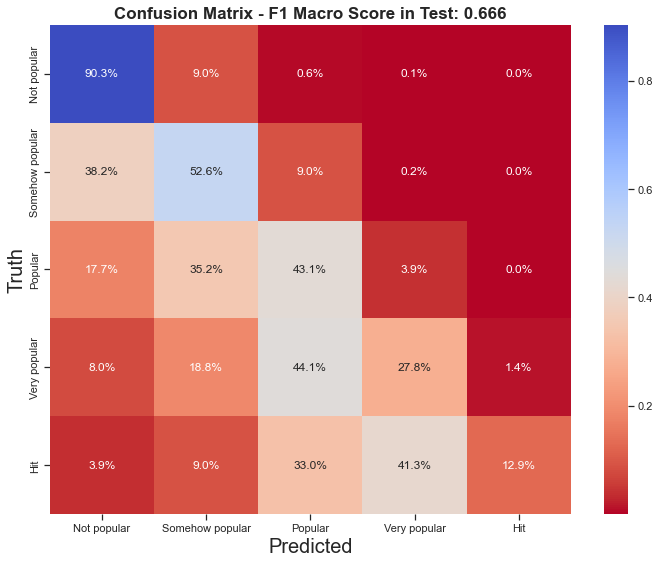

In [190]:
confuxion_matrix_trains(predictions=ann2_y_pred_test,scores_loaded=f1_macro_train2,y_train=y_test2_xgb) 

## Comparison of algorithms

In [191]:
#Create final dataset 
final_comparison=pd.concat([MULTILOG1_Results,KNN1_Results,RF1_Results,GNB1_Results,ADABOOST1_Results,ADABOOSTLR1_Results,SVM1_Results,GBOOST1_Results,XGB1_Results,ANN1_Results,
                            MULTILOG2_Results,KNN2_Results,RF2_Results,GNB2_Results,ADABOOST2_Results,ADABOOSTLR2_Results,SVM2_Results,GBOOST2_Results,XGB2_Results,ANN2_Results]).reset_index(drop=True)

In [192]:
final_comparison

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Time cross (seconds)
0,LOG,1,0.479592,0.000320,50.23
1,KNN,1,0.474676,0.000550,5225.36
2,RF,1,0.497514,0.000074,42.14
3,GNB,1,0.333865,0.002096,5.84
4,ADA,1,0.438242,0.005105,97.90
5,ADA Logistic,1,0.350991,0.000367,181.74
6,SVM,1,0.443583,0.000347,971.03
7,GBOOST,1,0.355357,0.003409,271.72
8,XGBOOST,1,0.518350,0.000298,598.85
9,ANN,1,0.526671,0.000000,553.47


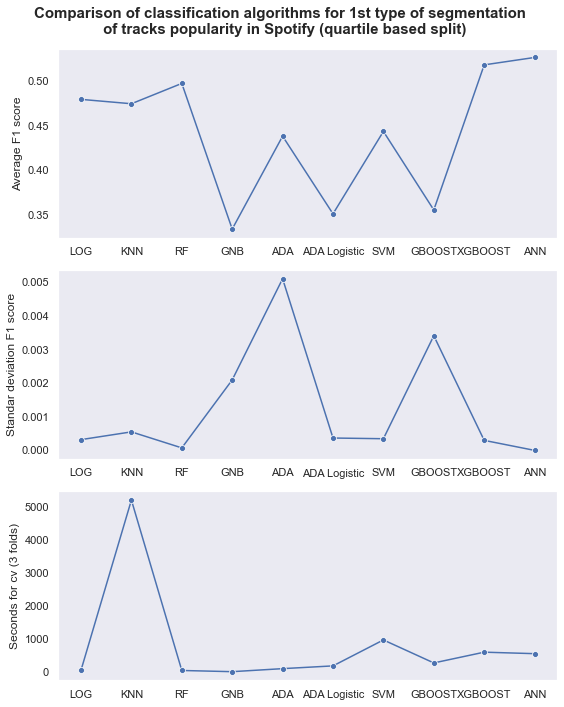

In [193]:
#Plot - Segmentation type 1
sns.set_style("dark")
fig,axes=plt.subplots(3,1,figsize=(8,10))
plt.suptitle('Comparison of classification algorithms for 1st type of segmentation \n of tracks popularity in Spotify (quartile based split)',fontsize=15,fontweight='bold')
ax1=sns.lineplot(data=final_comparison[final_comparison['Targe Type']==1],x='Name model',y='Average F1 Macro CV',marker='o',ax=axes[0])
ax1.set_xlabel('')
ax1.set_ylabel('Average F1 score')
ax2=sns.lineplot(data=final_comparison[final_comparison['Targe Type']==1],x='Name model',y='Std F1 Macro CV',marker='o',ax=axes[1])
ax2.set_xlabel('')
ax2.set_ylabel('Standar deviation F1 score')
ax3=sns.lineplot(data=final_comparison[final_comparison['Targe Type']==1],x='Name model',y='Time cross (seconds)',marker='o',ax=axes[2])
ax3.set_xlabel('')
ax3.set_ylabel('Seconds for cv (3 folds)')
plt.tight_layout()
plt.show()

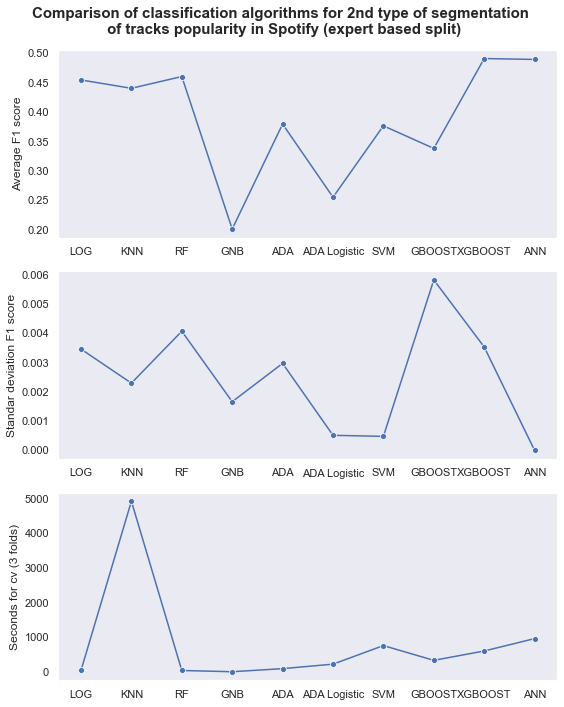

In [194]:
#Plot - Segmentation type 2
sns.set_style("dark")
fig,axes=plt.subplots(3,1,figsize=(8,10))
plt.suptitle('Comparison of classification algorithms for 2nd type of segmentation \n of tracks popularity in Spotify (expert based split)',fontsize=15,fontweight='bold')
ax1=sns.lineplot(data=final_comparison[final_comparison['Targe Type']==2],x='Name model',y='Average F1 Macro CV',marker='o',ax=axes[0])
ax1.set_xlabel('')
ax1.set_ylabel('Average F1 score')
ax2=sns.lineplot(data=final_comparison[final_comparison['Targe Type']==2],x='Name model',y='Std F1 Macro CV',marker='o',ax=axes[1])
ax2.set_xlabel('')
ax2.set_ylabel('Standar deviation F1 score')
ax3=sns.lineplot(data=final_comparison[final_comparison['Targe Type']==2],x='Name model',y='Time cross (seconds)',marker='o',ax=axes[2])
ax3.set_xlabel('')
ax3.set_ylabel('Seconds for cv (3 folds)')
plt.tight_layout()
plt.show()

## Classification Stage 2A: Hyperparameter optimization (Even Classification)

#### Selected algorithms

* Logistic Regression (Multilogistic)
* Random Forest
* XGboost (XGBOOST)
* Artificial Neural Network (ANN)

#### 1. Logistic Regression (Multilogistic)

Here we will play with two hyperparameters

1. **Regularization strenght (c):** In logistic regression, regularization is used to prevent overfitting and improve the generalization of the model. Smaller values = Less variance, more bias ; Larger values = Higher variance, less bias

    1.1.**Smaller C:** Stronger regularization, which makes the model simpler and less prone to overfitting. It shrinks the coefficients towards zero, leading to a simpler decision boundary. **This can sound contraintuitive because is the opposite of Lasso and Ridge in the sense that smaller values is stronger (in those cases, larger hyperaparameter - lambda - mean stronger regularizatin**
    1.2. **Larger C:** Weaker regularization, allowing the model to fit the training data more closely. It allows the coefficients to take larger values and results in a more complex decision boundary.
    
    
    
2. **solver:** The solver hyperparameter determines **the algorithm used to optimize the logistic regression model's cost function**. Different solvers use different optimization techniques to find the coefficients that best fit the data. For example, OLS is just a technique to optimize the parameters in Linear regression

* newton-cg: Newton Conjugate Gradient algorithm. Suitable for small and medium-sized datasets and supports both L2 and L2 regularization.
* lbfgs: Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm. Suitable for small and medium-sized datasets and works well with L2 regularization.
* liblinear: Library for Large Linear Classification. Suitable for large datasets and supports L1 and L2 regularization.
* sag: Stochastic Average Gradient. Suitable for large datasets and works with both L1 and L2 regularization.
* saga: An extension of SAG that also supports ElasticNet regularization.

A priori we will expect that sag, saga or liblinear make a better job (considering the size of the data). However, the results will tell us (that is reason to use GridSearch)

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
#A. Define the parameters we want to probe in a dictionary
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
#B. Create the instance
logreg_even1 = LogisticRegression(multi_class='multinomial', #Multinomial bc we have more than two targets
                                  max_iter=1000)

#C. Create a customized evaluation metric (in this case f1_score macro) - Thi is very important
scorer = make_scorer(f1_score, average='macro')

#D Initialize the GridSearchCV object
logreg1_gridsearch = GridSearchCV(logreg_even1, param_grid, cv=5, scoring=scorer)

In [196]:
# start_time = time.time()

# #E. Train the model
# history_log1gs=logreg1_gridsearch.fit(x_train1, y_train1)

# end_time = time.time()
# model_time_log1gs = end_time - start_time

In [197]:
# #Save history of models
# log1_gridsearch_result=pd.DataFrame(history_log1gs.cv_results_)
# log1_gridsearch_result.to_excel('history_log1gs.xlsx')
# #Save the best model obtained
# best_model = logreg1_gridsearch.best_estimator_
# joblib.dump(best_model, 'log1gs_bestmodel.pkl')
# #Save the best score obtained during training (is the average ! so dont worry)
# best_score = logreg1_gridsearch.best_score_
# with open("best_scorelogit1.txt", "w") as file:
#     file.write(str(best_score))
# #Save time
# with open("history_log1gs_time.txt", "w") as file:
#     file.write(str(model_time_log1gs))

In [198]:
#Load results of history
log1_gridsearch_result=pd.read_excel('history_log1gs.xlsx')
#Load best model
log1_bestmodel = joblib.load('log1gs_bestmodel.pkl')
#Load average training score of the best model
with open('best_scorelogit1.txt', 'r') as file:
    best_scorelogit1 = file.read()
best_scorelogit1 = float(best_scorelogit1) 
#Load time
with open('history_log1gs_time.txt', 'r') as file:
    model_time_log1gs = file.read()
model_time_log1gs = float(model_time_log1gs) 

In [199]:
#F. Plooting results (See how is the difference between models)
log1_gridsearch_result.head(5)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,116.904850,10.593136,0.144633,0.006592,0.01,newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.478396,0.475716,0.478924,0.478456,0.477241,0.477747,0.001157,14
1,1,55.385060,2.686169,0.134830,0.009581,0.01,lbfgs,"{'C': 0.01, 'solver': 'lbfgs'}",0.478374,0.475690,0.478925,0.478479,0.477245,0.477742,0.001166,16
2,2,0.578737,0.011281,0.000000,0.000000,0.01,liblinear,"{'C': 0.01, 'solver': 'liblinear'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
3,3,25.363617,1.099467,0.131425,0.005118,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.478397,0.475663,0.478944,0.478469,0.477276,0.477750,0.001178,13
4,4,59.964674,0.116067,0.127617,0.001500,0.01,saga,"{'C': 0.01, 'solver': 'saga'}",0.478396,0.475716,0.478917,0.478450,0.477241,0.477744,0.001155,15


In [200]:
#G. Evaluate in test
y_pred = log1_bestmodel.predict(x_test1)
log1_resulttest= f1_score(y_test1, y_pred, average='macro')

In [201]:
#Count all posible combination tried during this hyperparameter optimization process
models_probed=[]
for key in param_grid.values():
    models_probed.append(len(key))
total_product = 1  # Initialize with 1, as multiplication starts with this value
for num in models_probed:
    total_product *= num

#H. Save results for final comparison
Logit1_final=results_cv2(scores=best_scorelogit1,
                        name='Multilogit',
                         modelstried=total_product,
                         timemodels=model_time_log1gs/total_product,
                        time=model_time_log1gs,
                        typeproblem=1)
Logit1_final

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Models tried,Average train time per model (seconds),Total time training (seconds)
0,Multilogit,1,0.479921,0.0,20,1848.94,36978.86


#### 2. Random Forest

Here we will play with 3 hyperparameters:

1. **n_estimators:** This hyperparameter represents the number of decision trees in the random forest ensemble. Each tree in the forest contributes to the final prediction. **Increasing the number of estimators can lead to better performance, but it also increases the computational cost.** A larger number of estimators can improve the model's ability to generalize to new data.

2. **max_depth:** The max_depth hyperparameter determines the **maximum depth of each decision tree in the random forest**. It **restricts the number of nodes in a tree, which helps control overfitting (more nodes = more probability of overfitting)**. If set to None, nodes are expanded until they contain less than min_samples_split samples. Setting a finite max_depth can help the model generalize better, but it may also result in some underfitting.

3. **min_samples_split:** The min_samples_split hyperparameter **sets the minimum number of samples required to split an internal node in a decision tree**. If a node has fewer samples than min_samples_split, it will not be split further, becoming a leaf node. **Increasing this parameter can help to create larger tree nodes and prevent overfitting.**

In [202]:
#A. Define the parameters we want to probe in a dictionary
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [20, 50, 100]
}
#B. Create the instance
randomf_even1=RandomForestClassifier(random_state=42)
#C Initialize the GridSearchCV object
randf1_gridsearch = GridSearchCV(randomf_even1, param_grid, cv=3, scoring=scorer) #We are using f1 macro again (use scorer?)

In [203]:
# start_time = time.time()

# #D. Train the model
# history_randomf1gs=randf1_gridsearch.fit(x_train1, y_train1)

# end_time = time.time()
# model_time_randomf1gs = end_time - start_time

In [204]:
# #Save history of models
# randomf1_gridsearch_result=pd.DataFrame(history_randomf1gs.cv_results_)
# randomf1_gridsearch_result.to_excel('history_rf1gs.xlsx')
# #Save the best model obtained
# best_model = randf1_gridsearch.best_estimator_
# joblib.dump(best_model, 'rf1gs_bestmodel.pkl')
# #Save the best score obtained during training (is the average ! so dont worry)
# best_score = history_randomf1gs.best_score_ 
# with open("best_scorerf1.txt", "w") as file:
#     file.write(str(best_score))
# #Save time
# with open("history_rf1gs_time.txt", "w") as file:
#     file.write(str(model_time_randomf1gs))

In [205]:
#Load results of history
rf1_gridsearch_result=pd.read_excel('history_rf1gs.xlsx')
#Load best model
rf1_bestmodel = joblib.load('rf1gs_bestmodel.pkl')
#Load average training score of the best model
with open('best_scorerf1.txt', 'r') as file:
    best_scorerf1 = file.read()
best_scorerf1= float(best_scorerf1) 
#Load time
with open('history_rf1gs_time.txt', 'r') as file:
    model_time_randomf1gs = file.read()
model_time_randomf1gs = float(model_time_randomf1gs) 

In [206]:
#E. Plooting results (See how is the difference between models)
rf1_gridsearch_result.head(5)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0,146.393847,2.204046,6.679936,0.127236,NaN,20,50,"{'max_depth': None, 'min_samples_split': 20, '...",0.535889,0.535959,0.534109,0.535319,0.000856,5
1,1,291.228513,3.920748,12.816788,0.107332,NaN,20,100,"{'max_depth': None, 'min_samples_split': 20, '...",0.538525,0.538941,0.536766,0.538077,0.000943,2
2,2,431.982876,1.560940,19.110818,0.145840,NaN,20,150,"{'max_depth': None, 'min_samples_split': 20, '...",0.539032,0.539816,0.537850,0.538899,0.000808,1
3,3,138.791584,0.654973,5.325016,0.032653,NaN,50,50,"{'max_depth': None, 'min_samples_split': 50, '...",0.533300,0.534356,0.533033,0.533563,0.000571,6
4,4,278.266024,0.760012,10.406864,0.026974,NaN,50,100,"{'max_depth': None, 'min_samples_split': 50, '...",0.535539,0.536547,0.534792,0.535626,0.000719,4


In [207]:
#F. Evaluate in test
y_pred = rf1_bestmodel.predict(x_test1)
rf1_resulttest= f1_score(y_test1, y_pred, average='macro')

In [208]:
#Count all posible combination tried during this hyperparameter optimization process
models_probed=[]
for key in param_grid.values():
    models_probed.append(len(key))
total_product = 1  # Initialize with 1, as multiplication starts with this value
for num in models_probed:
    total_product *= num
    
#I. Save results for final comparison
RF1_final=results_cv2(scores=best_scorerf1,
                        name='Random Forest',
                     modelstried=total_product,
                     timemodels=model_time_randomf1gs/total_product,
                        time=model_time_randomf1gs,
                        typeproblem=1)
RF1_final

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Models tried,Average train time per model (seconds),Total time training (seconds)
0,Random Forest,1,0.538899,0.0,27,559.48,15105.95


#### 3. XGBoost

XGboost has tons of parameters with which we can play. In this case we will play with the parameters mentioned in this [Statquest video](https://www.youtube.com/watch?v=8b1JEDvenQU).

1. **n_estimators:** The number of boosting rounds or trees to build. More trees generally lead to better performance, but it can also increase the risk of overfitting.

2. **learning_rate:** Also known as the "eta," this parameter scales the contribution of each tree. Lower values make the algorithm more robust but might require more trees.

3. **max_depth:** Maximum depth or levels of a tree. Higher values can lead to overfitting, so this parameter helps control the complexity of individual trees.

4. **min_child_weight:** It helps control overfitting by requiring a minimum number of instances in each leaf.

5. **subsample:** Fraction of SAMPLES/CASES used for fitting the trees. A lower value can help prevent overfitting. (We can use all (1) or fractions)

6. **colsample_bytree:** Fraction of FEATURES/VARIABLES used when building each tree. It controls the randomness of feature selection for each tree. (all = 1)

7. **gamma:** Minimum loss reduction required to make a further partition. It acts as a regularization parameter by penalizing too complex trees. The idea is that que rest gamma to the gains of each node and if the result is negative, we PRUNE that node

8. **reg_alpha:** L1 regularization term on weights. It adds a penalty to the magnitude of feature weights, encouraging simpler models. **Stat quest** Values greater than 0 reduce the sensitivity of the tree to individual observations by pruning them and combining them with other observations - because they reduce SScore = reduce Gains = more chances of pruning

9. **reg_lambda:** L2 regularization term on weights. Similar to reg_alpha, it encourages smaller weights but uses a different penalty. **Stat quest** Values greater than 0 reduce the sensitivity of the tree to individual observations by pruning them and combining them with other observations - because they reduce SScore = reduce Gains = more chances of pruning

10. **class_weights  OR post_weight:** Parameter when dealing with unbalanced data to give some of them more importance than others. The first one is used in multiclass problems while the later in binary ones

**Due to the fact that there are a lot of parameters and we plan to use GridSearch, we have to be careful with the potential time that the experiment can take. For that reason is important to reflect on which parameters are actually important for context**


In [209]:
#A. Define the parameters we want to probe in a dictionary - We are going to list some important hyperparameter but we will not play with all of them for matter of time
param_grid = {
    'n_estimators': [100, 200], #Default is 100
    #'learning_rate': [0.01, 0.1, 0.2], #Default is 0.3
    'max_depth': [6, 8], #Default is 6
    #'min_child_weight': [1, 0.5], #The cover - the default is 1
    #'subsample': [0.8, 1.0], #Default is 1
    'colsample_bytree': [0.8, 1.0], #Default is 1
    'gamma': [0, 0.1], #Default is 0
    'reg_lambda': [0.5,1], #Default is 1
}
#B. Create the instance
xgb_even = xgb.XGBClassifier()
#C Initialize the GridSearchCV object
xgb1_gridsearch = GridSearchCV(xgb_even, param_grid, cv=3, scoring=scorer) 

In [210]:
# start_time = time.time()

# #D. Train the model
# history_xgb1gs=xgb1_gridsearch.fit(x_train1, y_train1_xgb)

# end_time = time.time()
# model_time_xgb1gs = end_time - start_time

In [211]:
# #Save history of models
# xgb1_gridsearch_result=pd.DataFrame(history_xgb1gs.cv_results_)
# xgb1_gridsearch_result.to_excel('history_xgb1gs.xlsx')
# #Save the best model obtained
# best_model = xgb1_gridsearch.best_estimator_
# joblib.dump(best_model, 'xgb1gs_bestmodel.pkl')
# #Save the best score obtained during training (is the average ! so dont worry)
# best_score = history_xgb1gs.best_score_ 
# with open("best_scorexgb1.txt", "w") as file:
#     file.write(str(best_score))
# #Save time
# with open("history_xgb1gs_time.txt", "w") as file:
#     file.write(str(model_time_xgb1gs))

In [212]:
#Load results of history
xgb1_gridsearch_result=pd.read_excel('history_xgb1gs.xlsx')
#Load best model
xgb1_bestmodel = joblib.load('xgb1gs_bestmodel.pkl')
#Load average training score of the best model
with open('best_scorexgb1.txt', 'r') as file:
    best_scorexgb1 = file.read()
best_scorexgb1= float(best_scorexgb1) 
#Load time
with open('history_xgb1gs_time.txt', 'r') as file:
    model_time_xgb1gs = file.read()
model_time_xgb1gs = float(model_time_xgb1gs) 

In [213]:
#E. Plooting results (See how is the difference between models)
xgb1_gridsearch_result.head(5)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_max_depth,param_n_estimators,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0,147.614979,1.037807,0.806678,0.058627,0.8,0.0,6,100,0.5,"{'colsample_bytree': 0.8, 'gamma': 0, 'max_dep...",0.518456,0.519727,0.517305,0.518496,0.000989,30
1,1,146.214668,1.630935,0.800846,0.056819,0.8,0.0,6,100,1.0,"{'colsample_bytree': 0.8, 'gamma': 0, 'max_dep...",0.517388,0.520481,0.517111,0.518327,0.001527,31
2,2,287.029208,2.374317,1.227275,0.010681,0.8,0.0,6,200,0.5,"{'colsample_bytree': 0.8, 'gamma': 0, 'max_dep...",0.528561,0.529076,0.528525,0.528721,0.000252,15
3,3,286.614322,1.582675,1.216605,0.003682,0.8,0.0,6,200,1.0,"{'colsample_bytree': 0.8, 'gamma': 0, 'max_dep...",0.528121,0.529770,0.527597,0.528496,0.000926,16
4,4,195.335052,0.610023,0.903535,0.013278,0.8,0.0,8,100,0.5,"{'colsample_bytree': 0.8, 'gamma': 0, 'max_dep...",0.527033,0.527468,0.524986,0.526496,0.001082,22


In [214]:
#F. Evaluate in test
y_pred = xgb1_bestmodel.predict(x_test1)
xgb1_resulttest= f1_score(y_test1_xgb, y_pred, average='macro')

In [215]:
#Count all posible combination tried during this hyperparameter optimization process
models_probed=[]
for key in param_grid.values():
    models_probed.append(len(key))
total_product = 1  # Initialize with 1, as multiplication starts with this value
for num in models_probed:
    total_product *= num

#H. Save results for final comparison
XGB1_final=results_cv2(scores=best_scorerf1,
                        name='XGBoost',
                       modelstried=total_product,
                       timemodels=model_time_xgb1gs/total_product,
                        time=model_time_xgb1gs,
                        typeproblem=1)
XGB1_final

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Models tried,Average train time per model (seconds),Total time training (seconds)
0,XGBoost,1,0.538899,0.0,32,844.59,27026.91


#### 4. Artificial Neural Network

Just as XG Boost ANN have tons of hyperparameter that we can play with. Here is a useful [video](https://www.youtube.com/watch?v=h291CuASDno) to understand them. For matter of time, in this context we will play with 4 hyperparameters (not learning rate :():

1. **Hidden Layers (hidden_layers)**: This hyperparameter represents the number of hidden layers in your neural network. Hidden layers are intermediary layers between the input and output layers. **By varying the number of hidden layers, we can control the depth and complexity of your network architecture**. 


2. **Neurons per Hidden Layer (neurons):** This hyperparameter defines the number of neurons (also known as units or nodes) in each hidden layer. Neurons in a layer process input data and produce output that feeds into the next layer. Different numbers of neurons can impact the capacity and representational power of your network. 

For number of neurons and hidden layers we should consider:

   * ***Expressiveness***: Increasing the number of hidden layers and neurons can increase the network's capacity to capture complex patterns in the data. This can be beneficial for tasks that require higher-level feature extraction or understanding intricate relationships.
     
   * ***Overfitting:*** However, increasing the number of layers and neurons **can also lead to overfitting, where the network memorizes the training data instead of learning generalizable patterns**. 

3. **Activation Functions (activations):** Activation functions introduce non-linearity to the neural network, enabling it to learn complex relationships in data. Different activation functions can affect how well our network learns and converges during training. 

Here we should consider:

 * ***Non-Linearity:*** Activation functions introduce non-linearity, enabling the network to model complex, non-linear relationships in the data. Different activation functions have varying degrees of expressiveness and influence on gradient flow during training.

 * ***Vanishing Gradient Problem:*** Some activation functions can mitigate the vanishing gradient problem, which can affect the training of deep networks. Tuning activation functions can impact how well gradients flow during backpropagation.

4. **Optimizers (optimizers):** Optimizers are **algorithms used to update the weights and biases of the neural network during training in order to minimize the loss function**. **In other words, how backpropagation is performed**. Different optimizers have different strategies for adjusting these parameters.

Here we should consider:

 * ***Convergence Speed:*** Different optimizers have different convergence behaviors. Some optimizers may converge faster and more reliably to a good solution, while others might require more careful tuning or have different convergence paths.

 * ***Generalization:*** Optimizers can also affect the network's ability to generalize to new data. A well-chosen optimizer can lead to better generalization and improved performance on unseen examples.

In [216]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#A. Create function (we will play with the parameters laters)
def create_model(hidden_layers=1,neurons=120,activation='relu',optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_shape=(94,), activation=activation))
    
    for _ in range(hidden_layers):
        model.add(Dense(neurons, activation=activation))  # Adding hidden layers with 12 units
        
    model.add(Dense(5, activation='softmax'))
    
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#B. Fix seed for reproducibility
seed = 2
tf.random.set_seed(seed)

#C. Create model
model = KerasClassifier(build_fn=create_model) #The argument is build_fn

#D. Dictionary
hidden_layers = [1, 2, 3]
neurons=[120,240]
activations=['relu','tahn']
optimizers=['adam','sgd']
param_grid = dict(hidden_layers=hidden_layers,neurons=neurons,activation=activations,optimizer=optimizers)

#E. Define gridsearch model
ann1_gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, cv=3,verbose=2)

In [217]:
# start_time = time.time()
# history_ann1gs = ann1_gs.fit(x_train1,np.double(y_train1_xgb),
#                             validation_split=0.2, callbacks=[stop_early,rlrop],workers=5,verbose=1,epochs=50,batch_size=20)
# end_time = time.time()
# model_time_ann1gs = end_time - start_time

In [218]:
# %%capture
# #Save history of models
# ann1_gridsearch_result=pd.DataFrame(history_ann1gs.cv_results_)
# ann1_gridsearch_result.to_excel('history_ann1gs.xlsx')
# #Save the best model obtained
# best_model = ann1_gs.best_estimator_
# joblib.dump(best_model, 'ann1_gs_bestmodel.pkl')
# #Save the best score obtained during training (is the average ! so dont worry)
# best_score = history_ann1gs.best_score_ #In this case the score is not F1 macro so we will have to do it later
# with open("best_scoreann1.txt", "w") as file:
#     file.write(str(best_score))
# #Save time
# with open("history_ann1gs_time.txt", "w") as file:
#     file.write(str(model_time_ann1gs))

In [219]:
%%capture
#Load results of history
ann1_gridsearch_result=pd.read_excel('history_ann1gs.xlsx')
#Load best model
ann1_bestmodel = joblib.load('ann1_gs_bestmodel.pkl')
#Load average training score of the best model
with open('best_scoreann1.txt', 'r') as file:
    best_scoreann1 = file.read()
best_scoreann1= float(best_scoreann1) #Remember this is accuracy, not F1 score
#Load time
with open('history_ann1gs_time.txt', 'r') as file:
    model_time_ann1gs = file.read()
model_time_ann1gs = float(model_time_ann1gs) 

In [220]:
#E. Plooting results (See how is the difference between models)
ann1_gridsearch_result.head(5)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layers,param_neurons,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0,875.175948,206.101731,14.822979,1.049367,relu,1,120,adam,"{'activation': 'relu', 'hidden_layers': 1, 'ne...",0.540959,0.542539,0.543001,0.542166,0.000874,8
1,1,1314.869948,50.669838,14.702890,0.060721,relu,1,120,sgd,"{'activation': 'relu', 'hidden_layers': 1, 'ne...",0.540099,0.541798,0.541679,0.541192,0.000774,12
2,2,745.994637,79.255533,15.127214,0.729530,relu,1,240,adam,"{'activation': 'relu', 'hidden_layers': 1, 'ne...",0.541816,0.541297,0.541372,0.541495,0.000229,10
3,3,1434.837205,93.454764,17.003787,0.112764,relu,1,240,sgd,"{'activation': 'relu', 'hidden_layers': 1, 'ne...",0.540519,0.544385,0.541999,0.542301,0.001593,7
4,4,778.621635,26.715064,14.437388,1.235172,relu,2,120,adam,"{'activation': 'relu', 'hidden_layers': 2, 'ne...",0.541800,0.542629,0.543221,0.542550,0.000583,6


In [221]:
#F. Get result for the training process in terms of F1-score macro   
ann1gs_y_pred_train = ann1_bestmodel.predict(x_train1)
# ann1gs_y_pred_train= np.argmax(ann1gs_y_pred_train, axis=1)  # Convert probabilities to class labels - IDK why this is not necesaary, the prediction already comes with argmax 

f1_macro_train1gs = f1_score(y_train1_xgb, ann1gs_y_pred_train, average='macro')
print("F1-score macro in train:", f1_macro_train1gs)

28995/28995 [==============================] - 29s 991us/step
F1-score macro in train: 0.5330383964662532


In [222]:
# #H. Get result for the test process in terms of F1-score macro
# ann1gs_y_pred_test = ann1_bestmodel.predict(x_test1)
# # ann1gs_y_pred_test = np.argmax(ann1gs_y_pred_test, axis=1)  # Convert probabilities to class labels -Same

# f1_macro_test1gs = f1_score(y_test1_xgb, ann1gs_y_pred_test, average='macro')
# print("F1-score macro in Test:", f1_macro_test1gs)

In [223]:
#Count all posible combination tried during this hyperparameter optimization process
models_probed=[]
for key in param_grid.values():
    models_probed.append(len(key))
total_product = 1  # Initialize with 1, as multiplication starts with this value
for num in models_probed:
    total_product *= num
    
#I. Save results for final comparison
ANN1_final=results_cv2(scores=f1_macro_train1gs, #Here we dont use best_score because it talk about accuracy and we want the F1 macro score for comparison
                        name='ANN',
                       modelstried=total_product,
                       timemodels=model_time_ann1gs /total_product,
                        time=model_time_ann1gs,
                        typeproblem=1)

ANN1_final
print(total_product)

24


### Even distribution: Final comparison of hyperparameter models

In [224]:
opt1_gs=pd.concat([Logit1_final,RF1_final,XGB1_final,ANN1_final]) #Add ANN1
opt1_gs=opt1_gs.reset_index(drop=True) #Is not possible to plot if all have the same row index

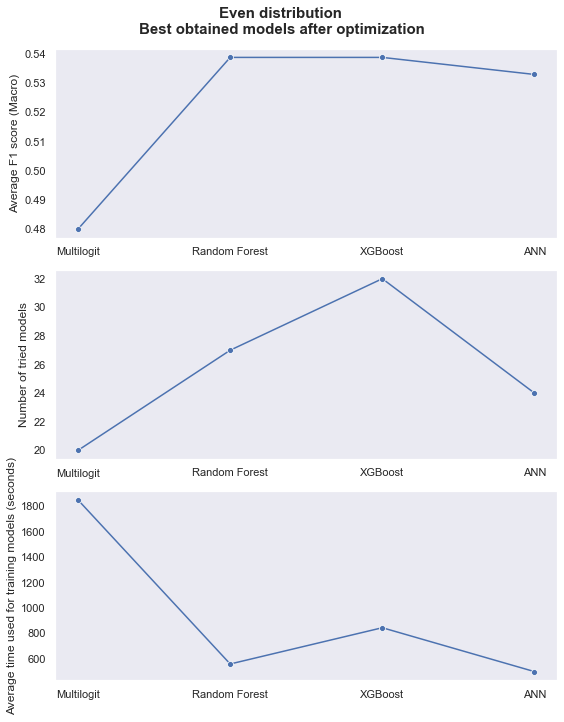

In [225]:
#Plot - 
sns.set_style("dark")
fig,axes=plt.subplots(3,1,figsize=(8,10))
plt.suptitle('Even distribution \nBest obtained models after optimization',fontsize=15,fontweight='bold')
ax1=sns.lineplot(data=opt1_gs,x='Name model',y='Average F1 Macro CV',marker='o',ax=axes[0])
ax1.set_xlabel('')
ax1.set_ylabel('Average F1 score (Macro)')
ax2=sns.lineplot(data=opt1_gs,x='Name model',y='Models tried',marker='o',ax=axes[1])
ax2.set_xlabel('')
ax2.set_ylabel('Number of tried models')
ax3=sns.lineplot(data=opt1_gs,x='Name model',y='Average train time per model (seconds)',marker='o',ax=axes[2])
ax3.set_xlabel('')
ax3.set_ylabel('Average time used for training models (seconds)')
plt.tight_layout()
plt.show()

#### Everything considered, it seems like RForest and XGboost are the more accurate and efficient models for this task. Thus, lets evaluate his final performance in the test set (Here we finally use the function confux_matrix_opti)

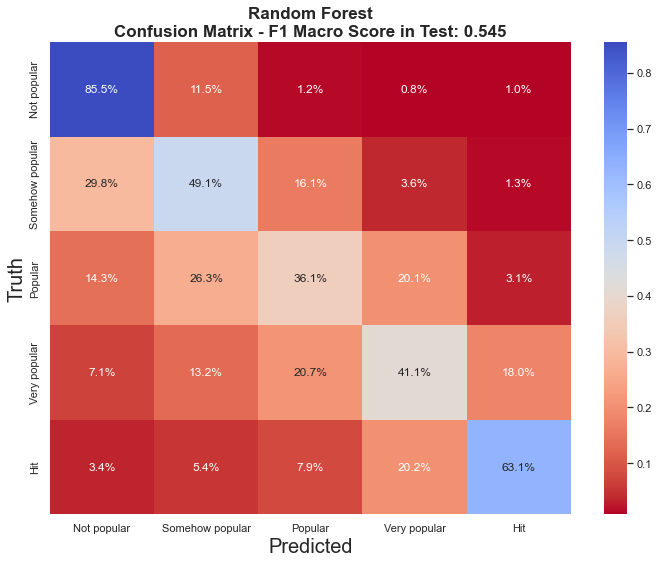

In [226]:
confux_matrix_opti(modelname='Random Forest',
                   bestmodel=rf1_bestmodel,
                  x_test=x_test1,
                  y_test=y_test1)

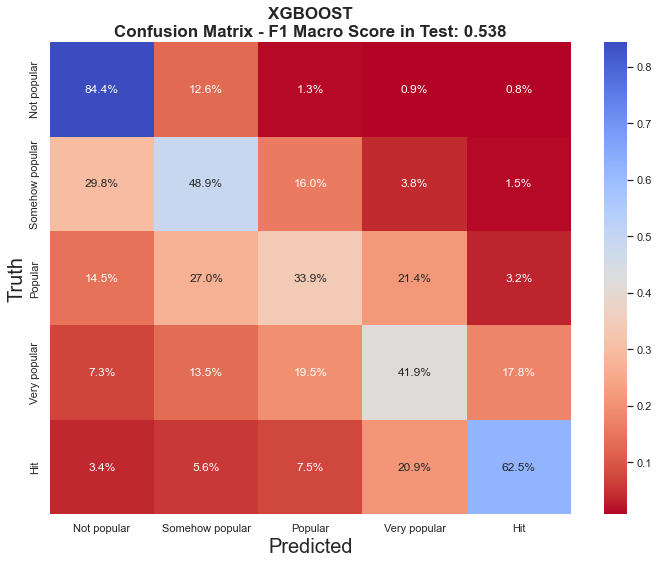

In [227]:
confux_matrix_opti(modelname='XGBOOST',
                   bestmodel=xgb1_bestmodel,
                  x_test=x_test1,
                  y_test=y_test1_xgb)

## Classification Stage 2B: Hyperparameter optimization (Uneven Classification)

#### Selected algorithms

* Logistic Regression (Multilogistic)
* Random Forest
* XGboost (XGBOOST)
* Artificial Neural Network (ANN)

#### A. Logistic Regression

In [228]:
#A. Define the parameters we want to probe in a dictionary
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
#B. Create the instance
logreg_uneven1 = LogisticRegression(multi_class='multinomial', #Multinomial bc we have more than two targets
                                  max_iter=1000)

#C. Create a customized evaluation metric (in this case f1_score macro) - Thi is very important
scorer = make_scorer(f1_score, average='macro')

#D Initialize the GridSearchCV object
logreg2_gridsearch = GridSearchCV(logreg_uneven1, param_grid, cv=3, scoring=scorer)

In [229]:
# start_time = time.time()

# #E. Train the model
# history_log2gs=logreg2_gridsearch.fit(x_train2, y_train2)

# end_time = time.time()
# model_time_log2gs = end_time - start_time

In [230]:
# #Save history of models
# log2_gridsearch_result=pd.DataFrame(history_log2gs.cv_results_)
# log2_gridsearch_result.to_excel('history_log2gs.xlsx')
# #Save the best model obtained
# best_model = logreg2_gridsearch.best_estimator_
# joblib.dump(best_model, 'log2gs_bestmodel.pkl')
# #Save the best score obtained during training (is the average ! so dont worry)
# best_score = logreg2_gridsearch.best_score_
# with open("best_scorelogit2.txt", "w") as file:
#     file.write(str(best_score))
# #Save time
# with open("history_log2gs_time.txt", "w") as file:
#     file.write(str(model_time_log2gs))

In [231]:
#Load results of history
log2_gridsearch_result=pd.read_excel('history_log2gs.xlsx')
#Load best model
log2_bestmodel = joblib.load('log2gs_bestmodel.pkl')
#Load average training score of the best model
with open('best_scorelogit2.txt', 'r') as file:
    best_scorelogit2 = file.read()
best_scorelogit2 = float(best_scorelogit2) 
#Load time
with open('history_log2gs_time.txt', 'r') as file:
    model_time_log2gs = file.read()
model_time_log2gs = float(model_time_log2gs) 

In [232]:
#F. Plooting results (See how is the difference between models)
log2_gridsearch_result.head(5)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0,105.047990,3.599355,0.236128,0.015160,0.01,newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.424832,0.424701,0.427533,0.425688,0.001305,15
1,1,66.355946,0.861838,0.222020,0.005389,0.01,lbfgs,"{'C': 0.01, 'solver': 'lbfgs'}",0.424825,0.424725,0.427606,0.425718,0.001335,13
2,2,0.559828,0.013500,0.000000,0.000000,0.01,liblinear,"{'C': 0.01, 'solver': 'liblinear'}",NaN,NaN,NaN,NaN,NaN,19
3,3,25.096805,0.060779,0.211893,0.002771,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.424832,0.424706,0.427530,0.425689,0.001303,14
4,4,68.132358,0.942615,0.213434,0.007588,0.01,saga,"{'C': 0.01, 'solver': 'saga'}",0.424832,0.424701,0.427533,0.425688,0.001305,15


In [233]:
#G. Evaluate in test
y_pred = log2_bestmodel.predict(x_test2)
log2_resulttest= f1_score(y_test2, y_pred, average='macro')

In [234]:
#Count all posible combination tried during this hyperparameter optimization process
models_probed=[]
for key in param_grid.values():
    models_probed.append(len(key))
total_product = 1  # Initialize with 1, as multiplication starts with this value
for num in models_probed:
    total_product *= num

#H. Save results for final comparison
Logit2_final=results_cv2(scores=best_scorelogit2,
                        name='Multilogit',
                         modelstried=total_product,
                         timemodels=model_time_log2gs/total_product,
                        time=model_time_log2gs,
                        typeproblem=2)
Logit2_final

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Models tried,Average train time per model (seconds),Total time training (seconds)
0,Multilogit,2,0.45856,0.0,20,1387.06,27741.28


#### B. Random Forest

In [235]:
#A. Define the parameters we want to probe in a dictionary
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [20, 50, 100]
}
#B. Create the instance
randomf_even2=RandomForestClassifier(random_state=42)
#C Initialize the GridSearchCV object
randf2_gridsearch = GridSearchCV(randomf_even2, param_grid, cv=3, scoring=scorer) #We are using f1 macro again (use scorer?)

In [236]:
# start_time = time.time()

# #D. Train the model
# history_randomf2gs=randf2_gridsearch.fit(x_train2, y_train2)

# end_time = time.time()
# model_time_randomf2gs = end_time - start_time

In [237]:
# #Save history of models
# randomf2_gridsearch_result=pd.DataFrame(history_randomf2gs.cv_results_)
# randomf2_gridsearch_result.to_excel('history_rf2gs.xlsx')
# #Save the best model obtained
# best_model = randf2_gridsearch.best_estimator_
# joblib.dump(best_model, 'rf2gs_bestmodel.pkl')
# #Save the best score obtained during training (is the average ! so dont worry)
# best_score = history_randomf2gs.best_score_ 
# with open("best_scorerf2.txt", "w") as file:
#     file.write(str(best_score))
# #Save time
# with open("history_rf2gs_time.txt", "w") as file:
#     file.write(str(model_time_randomf2gs))

In [238]:
#Load results of history
rf2_gridsearch_result=pd.read_excel('history_rf2gs.xlsx')
#Load best model
rf2_bestmodel = joblib.load('rf2gs_bestmodel.pkl')
#Load average training score of the best model
with open('best_scorerf2.txt', 'r') as file:
    best_scorerf2 = file.read()
best_scorerf2= float(best_scorerf2) 
#Load time
with open('history_rf2gs_time.txt', 'r') as file:
    model_time_randomf2gs = file.read()
model_time_randomf2gs = float(model_time_randomf2gs) 

In [239]:
#E. Plooting results (See how is the difference between models)
rf2_gridsearch_result.head(5)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0,150.062187,0.420059,6.968727,0.513468,NaN,20,50,"{'max_depth': None, 'min_samples_split': 20, '...",0.484545,0.483656,0.481455,0.483219,0.001299,3
1,1,300.370680,3.385482,12.868734,0.240082,NaN,20,100,"{'max_depth': None, 'min_samples_split': 20, '...",0.485121,0.484221,0.482353,0.483898,0.001153,2
2,2,427.304261,1.141095,18.742455,0.074096,NaN,20,150,"{'max_depth': None, 'min_samples_split': 20, '...",0.485101,0.484521,0.482942,0.484188,0.000913,1
3,3,139.909637,0.678688,5.325051,0.012551,NaN,50,50,"{'max_depth': None, 'min_samples_split': 50, '...",0.481195,0.478230,0.476962,0.478795,0.001774,6
4,4,276.703392,0.628884,10.381326,0.015520,NaN,50,100,"{'max_depth': None, 'min_samples_split': 50, '...",0.481513,0.478402,0.478342,0.479419,0.001481,5


In [240]:
#F. Evaluate in test
y_pred = rf2_bestmodel.predict(x_test2)
rf2_resulttest= f1_score(y_test2, y_pred, average='macro')

In [241]:
#Count all posible combination tried during this hyperparameter optimization process
models_probed=[]
for key in param_grid.values():
    models_probed.append(len(key))
total_product = 1  # Initialize with 1, as multiplication starts with this value
for num in models_probed:
    total_product *= num
    
#I. Save results for final comparison
RF2_final=results_cv2(scores=best_scorerf2,
                        name='Random Forest',
                     modelstried=total_product,
                     timemodels=model_time_randomf2gs/total_product,
                        time=model_time_randomf2gs,
                        typeproblem=2)
RF2_final

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Models tried,Average train time per model (seconds),Total time training (seconds)
0,Random Forest,2,0.484188,0.0,27,560.82,15142.27


#### 3. XGBoost

In [242]:
#A. Define the parameters we want to probe in a dictionary - We are going to list some important hyperparameter but we will not play with all of them for matter of time
param_grid = {
    'n_estimators': [100, 200], #Default is 100
    #'learning_rate': [0.01, 0.1, 0.2], #Default is 0.3
    'max_depth': [6, 8], #Default is 6
    #'min_child_weight': [1, 0.5], #The cover - the default is 1
    #'subsample': [0.8, 1.0], #Default is 1
    'colsample_bytree': [0.8, 1.0], #Default is 1
    'gamma': [0, 0.1], #Default is 0
    'reg_lambda': [0.5,1], #Default is 1
}
#B. Create the instance
xgb_even2 = xgb.XGBClassifier()
#C Initialize the GridSearchCV object
xgb2_gridsearch = GridSearchCV(xgb_even2, param_grid, cv=3, scoring=scorer) 

In [243]:
# start_time = time.time()

# #D. Train the model
# history_xgb2gs=xgb2_gridsearch.fit(x_train2_copy, y_train2_xgb)

# end_time = time.time()
# model_time_xgb2gs = end_time - start_time

In [244]:
# #Save history of models
# xgb2_gridsearch_result=pd.DataFrame(history_xgb2gs.cv_results_)
# xgb2_gridsearch_result.to_excel('history_xgb2gs.xlsx')
# #Save the best model obtained
# best_model = xgb2_gridsearch.best_estimator_
# joblib.dump(best_model, 'xgb2gs_bestmodel.pkl')
# #Save the best score obtained during training (is the average ! so dont worry)
# best_score = history_xgb2gs.best_score_ 
# with open("best_scorexgb2.txt", "w") as file:
#     file.write(str(best_score))
# #Save time
# with open("history_xgb2gs_time.txt", "w") as file:
#     file.write(str(model_time_xgb2gs))

In [245]:
#Load results of history
xgb2_gridsearch_result=pd.read_excel('history_xgb2gs.xlsx')
#Load best model
xgb2_bestmodel = joblib.load('xgb2gs_bestmodel.pkl')
#Load average training score of the best model
with open('best_scorexgb2.txt', 'r') as file:
    best_scorexgb2 = file.read()
best_scorexgb2= float(best_scorexgb2) 
#Load time
with open('history_xgb2gs_time.txt', 'r') as file:
    model_time_xgb2gs = file.read()
model_time_xgb2gs = float(model_time_xgb2gs) 

In [246]:
#E. Plooting results (See how is the difference between models)
xgb2_gridsearch_result.head(5)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_max_depth,param_n_estimators,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0,151.747761,3.991950,0.775841,0.005436,0.8,0.0,6,100,0.5,"{'colsample_bytree': 0.8, 'gamma': 0, 'max_dep...",0.492384,0.490865,0.487307,0.490186,0.002128,32
1,1,148.691576,1.493371,0.794642,0.046380,0.8,0.0,6,100,1.0,"{'colsample_bytree': 0.8, 'gamma': 0, 'max_dep...",0.493044,0.492689,0.490493,0.492075,0.001128,27
2,2,289.998066,2.104481,1.235610,0.004191,0.8,0.0,6,200,0.5,"{'colsample_bytree': 0.8, 'gamma': 0, 'max_dep...",0.497561,0.496815,0.494966,0.496447,0.001091,17
3,3,290.702928,0.988611,1.270619,0.027385,0.8,0.0,6,200,1.0,"{'colsample_bytree': 0.8, 'gamma': 0, 'max_dep...",0.498698,0.497974,0.496645,0.497772,0.000850,11
4,4,197.966070,1.116930,0.914538,0.020553,0.8,0.0,8,100,0.5,"{'colsample_bytree': 0.8, 'gamma': 0, 'max_dep...",0.496774,0.498967,0.491967,0.495903,0.002923,22


In [247]:
#F. Evaluate in test
y_pred = xgb2_bestmodel.predict(x_test2_copy)
xgb2_resulttest= f1_score(y_test2_xgb, y_pred, average='macro')

In [248]:
#Count all posible combination tried during this hyperparameter optimization process
models_probed=[]
for key in param_grid.values():
    models_probed.append(len(key))
total_product = 1  # Initialize with 1, as multiplication starts with this value
for num in models_probed:
    total_product *= num

#H. Save results for final comparison
XGB2_final=results_cv2(scores=best_scorerf2,
                        name='XGBoost',
                       modelstried=total_product,
                       timemodels=model_time_xgb2gs/total_product,
                        time=model_time_xgb2gs,
                        typeproblem=2)
XGB2_final

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Models tried,Average train time per model (seconds),Total time training (seconds)
0,XGBoost,2,0.484188,0.0,32,870.77,27864.56


#### 4. Artificial Neural Network

In [249]:
#Review - The input shape could be different
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#A. Create function (we will play with the parameters laters)
def create_model(hidden_layers=1,neurons=120,activation='relu',optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_shape=(94,), activation=activation))
    
    for _ in range(hidden_layers):
        model.add(Dense(neurons, activation=activation))  # Adding hidden layers with 12 units
        
    model.add(Dense(5, activation='softmax'))
    
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#B. Fix seed for reproducibility
seed = 2
tf.random.set_seed(seed)

#C. Create model
model2 = KerasClassifier(build_fn=create_model) #The argument is build_fn

#D. Dictionary
hidden_layers = [1, 2, 3]
neurons=[120,240]
activations=['relu','tahn']
optimizers=['adam','sgd']
param_grid = dict(hidden_layers=hidden_layers,neurons=neurons,activation=activations,optimizer=optimizers)

#E. Define gridsearch model
ann2_gs = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=4, cv=3,verbose=2)

In [250]:
# start_time = time.time()
# x_train2_copy=x_train2_copy.drop(columns=94)
# x_test2_copy=x_test2_copy.drop(columns=94)
# history_ann2gs = ann2_gs.fit(x_train2_copy,np.double(y_train2_xgb),
#                             validation_split=0.2, callbacks=[stop_early,rlrop],workers=5,verbose=1,epochs=50,batch_size=20)
# end_time = time.time()
# model_time_ann2gs = end_time - start_time

In [251]:
# %%capture
# #Save history of models
# ann2_gridsearch_result=pd.DataFrame(history_ann2gs.cv_results_)
# ann2_gridsearch_result.to_excel('history_ann2gs.xlsx')
# #Save the best model obtained
# best_model = ann2_gs.best_estimator_
# joblib.dump(best_model, 'ann2_gs_bestmodel.pkl')
# #Save the best score obtained during training (is the average ! so dont worry)
# best_score = history_ann2gs.best_score_ #In this case the score is not F1 macro so we will have to do it later
# with open("best_scoreann2.txt", "w") as file:
#     file.write(str(best_score))
# #Save time
# with open("history_ann2gs_time.txt", "w") as file:
#     file.write(str(model_time_ann2gs))

In [252]:
%%capture
#Load results of history
ann2_gridsearch_result=pd.read_excel('history_ann2gs.xlsx')
#Load best model
ann2_bestmodel = joblib.load('ann2_gs_bestmodel.pkl')
#Load average training score of the best model
with open('best_scoreann2.txt', 'r') as file:
    best_scoreann2 = file.read()
best_scoreann2= float(best_scoreann2) #Remember this is accuracy, not F1 score
#Load time
with open('history_ann2gs_time.txt', 'r') as file:
    model_time_ann2gs = file.read()
model_time_ann2gs = float(model_time_ann2gs) 

In [253]:
#E. Plooting results (See how is the difference between models)
ann2_gridsearch_result.head(5)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layers,param_neurons,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0,535.886367,107.902401,12.764909,0.287078,relu,1,120,adam,"{'activation': 'relu', 'hidden_layers': 1, 'ne...",0.683171,0.683396,0.681861,0.682809,0.000677,10
1,1,1084.240008,321.404211,13.208079,0.397983,relu,1,120,sgd,"{'activation': 'relu', 'hidden_layers': 1, 'ne...",0.683860,0.681938,0.683228,0.683009,0.000800,7
2,2,808.301621,111.722284,14.921242,0.086912,relu,1,240,adam,"{'activation': 'relu', 'hidden_layers': 1, 'ne...",0.683181,0.684418,0.682692,0.683430,0.000727,4
3,3,1204.153647,256.540744,15.627244,0.719373,relu,1,240,sgd,"{'activation': 'relu', 'hidden_layers': 1, 'ne...",0.682324,0.683658,0.683154,0.683045,0.000550,6
4,4,695.259918,59.366420,13.232142,0.806300,relu,2,120,adam,"{'activation': 'relu', 'hidden_layers': 2, 'ne...",0.684817,0.684457,0.682886,0.684053,0.000839,1


In [254]:
x_train3_copy=x_train2_copy.drop(columns=94)
#F. Get result for the training process in terms of F1-score macro   
ann2gs_y_pred_train = ann2_bestmodel.predict(x_train3_copy)
# ann1gs_y_pred_train= np.argmax(ann1gs_y_pred_train, axis=1)  # Convert probabilities to class labels - IDK why this is not necesaary, the prediction already comes with argmax 

f1_macro_train2gs = f1_score(y_train2_xgb, ann2gs_y_pred_train, average='macro')
print("F1-score macro in train:", f1_macro_train2gs)

28995/28995 [==============================] - 26s 909us/step
F1-score macro in train: 0.48172696508790136


In [255]:
# #H. Get result for the test process in terms of F1-score macro
# ann2gs_y_pred_test = ann2_bestmodel.predict(x_test2)
# # ann2gs_y_pred_test = np.argmax(ann2gs_y_pred_test, axis=1)  # Convert probabilities to class labels -Same

# f1_macro_test2gs = f1_score(y_test2_xgb, ann2gs_y_pred_test, average='macro')
# print("F1-score macro in Test:", f1_macro_test2gs)

In [256]:
#Count all posible combination tried during this hyperparameter optimization process
models_probed=[]
for key in param_grid.values():
    models_probed.append(len(key))
total_product = 1  # Initialize with 1, as multiplication starts with this value
for num in models_probed:
    total_product *= num
    
#I. Save results for final comparison
ANN2_final=results_cv2(scores=f1_macro_train2gs, #Here we dont use best_score because it talk about accuracy and we want the F1 macro score for comparison
                        name='ANN',
                       modelstried=total_product,
                       timemodels=model_time_ann2gs /total_product,
                        time=model_time_ann2gs,
                        typeproblem=2)

ANN2_final

,Name model,Targe Type,Average F1 Macro CV,Std F1 Macro CV,Models tried,Average train time per model (seconds),Total time training (seconds)
0,ANN,2,0.481727,0.0,24,442.91,10629.73


### Uneven distribution: Final comparison of hyperparameter models

In [257]:
opt2_gs=pd.concat([Logit2_final,RF2_final,XGB2_final,ANN2_final]) #Add ANN1
opt2_gs=opt2_gs.reset_index(drop=True) #Is not possible to plot if all have the same row index

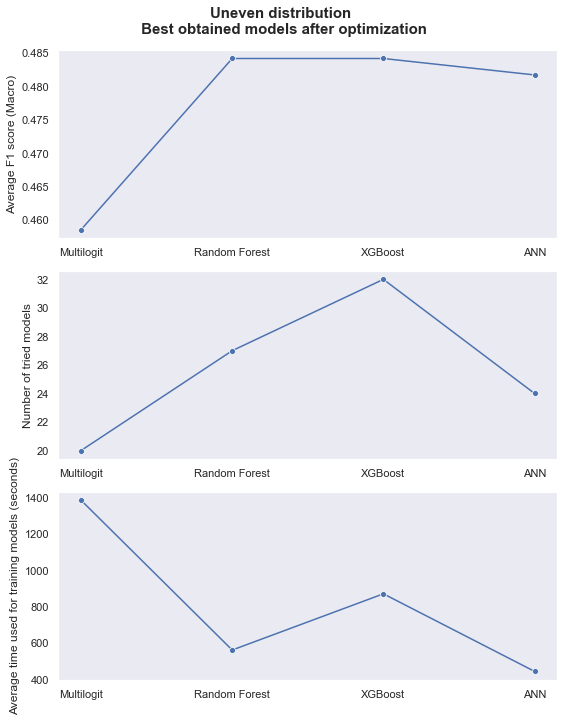

In [258]:
#Plot - 
sns.set_style("dark")
fig,axes=plt.subplots(3,1,figsize=(8,10))
plt.suptitle('Uneven distribution \n Best obtained models after optimization',fontsize=15,fontweight='bold')
ax1=sns.lineplot(data=opt2_gs,x='Name model',y='Average F1 Macro CV',marker='o',ax=axes[0])
ax1.set_xlabel('')
ax1.set_ylabel('Average F1 score (Macro)')
ax2=sns.lineplot(data=opt2_gs,x='Name model',y='Models tried',marker='o',ax=axes[1])
ax2.set_xlabel('')
ax2.set_ylabel('Number of tried models')
ax3=sns.lineplot(data=opt2_gs,x='Name model',y='Average train time per model (seconds)',marker='o',ax=axes[2])
ax3.set_xlabel('')
ax3.set_ylabel('Average time used for training models (seconds)')
plt.tight_layout()
plt.show()

#### Everything considered, it seems like RForest and XGboost are the more accurate and efficient models for this task. Thus, lets evaluate his final performance in the test set (Here we finally use the function confux_matrix_opti).

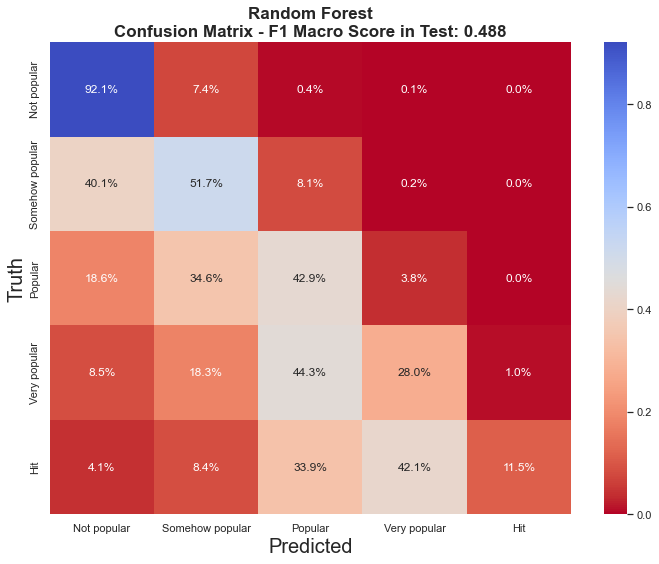

In [259]:
#Change according to results
confux_matrix_opti(modelname='Random Forest',
                   bestmodel=rf2_bestmodel,
                  x_test=x_test2,
                  y_test=y_test2)

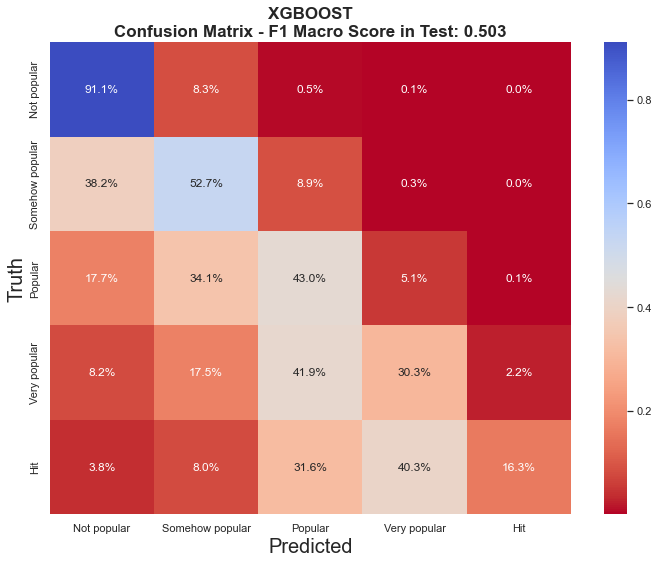

In [260]:
#Change according to results
confux_matrix_opti(modelname='XGBOOST',
                   bestmodel=xgb2_bestmodel,
                  x_test=x_test2_copy,
                  y_test=y_test2_xgb)